In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import IsolationForest

import eda_helper_functions

## Read the Training Data

In [3]:
file_path = r"E:\Electirc Viechels\data\train.csv"
train = pd.read_csv(file_path)

train

country       city       state  model_year manufacturer     model  \
0       Snohomish    Edmonds  Washington        1970    CHEVROLET  BOLT EUV   
1            King   Kirkland  Washington        1970       NISSAN     ARIYA   
2            King    Kenmore  Washington        1970        TESLA   MODEL Y   
3            King  Sammamish  Washington        1970        TESLA   MODEL S   
4          Pierce     Tacoma  Washington        1970        TESLA   MODEL Y   
...           ...        ...         ...         ...          ...       ...   
122495       King    Seattle  Washington        1970        TESLA   MODEL S   
122496       King    Seattle  Washington        1970          BMW        X5   
122497  Snohomish    Everett  Washington        1970        TESLA   MODEL Y   
122498       King   Kirkland  Washington        1970        TESLA   MODEL 3   
122499       King    Seattle  Washington        1970        TESLA   MODEL Y   

       electric_type clean_fuel_eligibility                 vehicle_location  \
0                BEV                unknown   POINT (-122.3757836 47.800042)   
1                BEV                unknown  POINT (-122.2026532 47.7210518)   
2                BEV                unknown    POINT (-122.2478069 47.75817)   
3                BEV               eligible  POINT (-122.0181135 47.5880568)   
4                BEV                unknown     POINT (-122.48056 47.214139)   
...              ...                    ...                              ...   
122495           BEV               eligible    POINT (-122.342434 47.736655)   
122496          PHEV               eligible  POINT (-122.3173531 47.5484673)   
122497           BEV                unknown  POINT (-122.2032349 47.8956271)   
122498           BEV                unknown  POINT (-122.2026532 47.7210518)   
122499           BEV                unknown  POINT (-122.3008235 47.6862671)   

        electric_range  
0                    0  
1                    0  
2                    0  
3                  210  
4                    0  
...                ...  
122495             210  
122496              30  
122497               0  
122498               0  
122499               0  

[122500 rows x 10 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122500 entries, 0 to 122499
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   country                 122498 non-null  object
 1   city                    122498 non-null  object
 2   state                   122500 non-null  object
 3   model_year              122500 non-null  int64 
 4   manufacturer            122500 non-null  object
 5   model                   122500 non-null  object
 6   electric_type           122500 non-null  object
 7   clean_fuel_eligibility  122500 non-null  object
 8   vehicle_location        122495 non-null  object
 9   electric_range          122500 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 9.3+ MB


## Fixing Data Types

In [6]:
train['model_year'] = pd.to_datetime(train['model_year'], format='%Y').dt.to_period('Y')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122500 entries, 0 to 122499
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype        
---  ------                  --------------   -----        
 0   country                 122498 non-null  object       
 1   city                    122498 non-null  object       
 2   state                   122500 non-null  object       
 3   model_year              122500 non-null  period[Y-DEC]
 4   manufacturer            122500 non-null  object       
 5   model                   122500 non-null  object       
 6   electric_type           122500 non-null  object       
 7   clean_fuel_eligibility  122500 non-null  object       
 8   vehicle_location        122495 non-null  object       
 9   electric_range          122500 non-null  int64        
dtypes: int64(1), object(8), period[Y-DEC](1)
memory usage: 9.3+ MB


In [8]:
train

country       city       state model_year manufacturer     model  \
0       Snohomish    Edmonds  Washington       1970    CHEVROLET  BOLT EUV   
1            King   Kirkland  Washington       1970       NISSAN     ARIYA   
2            King    Kenmore  Washington       1970        TESLA   MODEL Y   
3            King  Sammamish  Washington       1970        TESLA   MODEL S   
4          Pierce     Tacoma  Washington       1970        TESLA   MODEL Y   
...           ...        ...         ...        ...          ...       ...   
122495       King    Seattle  Washington       1970        TESLA   MODEL S   
122496       King    Seattle  Washington       1970          BMW        X5   
122497  Snohomish    Everett  Washington       1970        TESLA   MODEL Y   
122498       King   Kirkland  Washington       1970        TESLA   MODEL 3   
122499       King    Seattle  Washington       1970        TESLA   MODEL Y   

       electric_type clean_fuel_eligibility                 vehicle_location  \
0                BEV                unknown   POINT (-122.3757836 47.800042)   
1                BEV                unknown  POINT (-122.2026532 47.7210518)   
2                BEV                unknown    POINT (-122.2478069 47.75817)   
3                BEV               eligible  POINT (-122.0181135 47.5880568)   
4                BEV                unknown     POINT (-122.48056 47.214139)   
...              ...                    ...                              ...   
122495           BEV               eligible    POINT (-122.342434 47.736655)   
122496          PHEV               eligible  POINT (-122.3173531 47.5484673)   
122497           BEV                unknown  POINT (-122.2032349 47.8956271)   
122498           BEV                unknown  POINT (-122.2026532 47.7210518)   
122499           BEV                unknown  POINT (-122.3008235 47.6862671)   

        electric_range  
0                    0  
1                    0  
2                    0  
3                  210  
4                    0  
...                ...  
122495             210  
122496              30  
122497               0  
122498               0  
122499               0  

[122500 rows x 10 columns]

## High level Summary of data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122500 entries, 0 to 122499
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype        
---  ------                  --------------   -----        
 0   country                 122498 non-null  object       
 1   city                    122498 non-null  object       
 2   state                   122500 non-null  object       
 3   model_year              122500 non-null  period[Y-DEC]
 4   manufacturer            122500 non-null  object       
 5   model                   122500 non-null  object       
 6   electric_type           122500 non-null  object       
 7   clean_fuel_eligibility  122500 non-null  object       
 8   vehicle_location        122495 non-null  object       
 9   electric_range          122500 non-null  int64        
dtypes: int64(1), object(8), period[Y-DEC](1)
memory usage: 9.3+ MB


In [11]:
train.describe()

electric_range
count   122500.000000
mean        55.738424
std         90.248280
min          0.000000
25%          0.000000
50%          0.000000
75%         72.000000
max        337.000000

## High level Analysis of Missing values

In [13]:
# Now we chek the missing values
eda_helper_functions.missing_info(train)

count  percentage
variable                           
vehicle_location      5    0.004082
country               2    0.001633
city                  2    0.001633

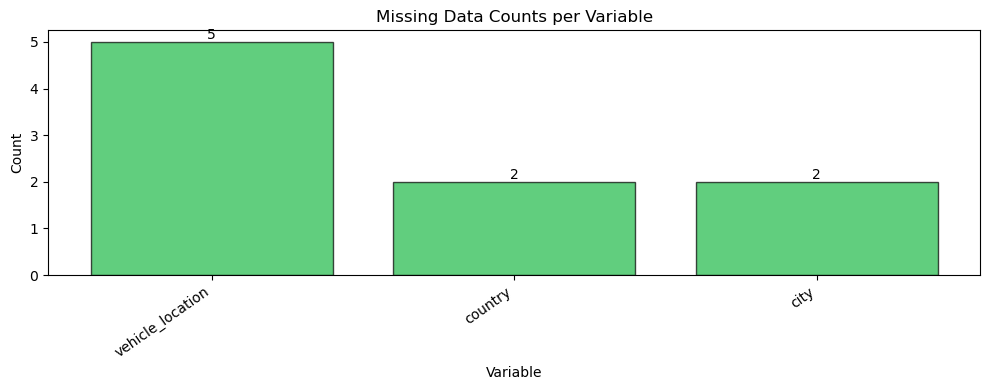

In [14]:
# Now we plot the missing valuesabs
eda_helper_functions.plot_missing_info(train)


## High level Analysis of outliers

In [16]:
# we have no numeric column in our input columns so we cannot find the outlier 
forest = IsolationForest(n_estimators=10,random_state=42)

In [17]:
# (
#     train
#     .assign(
#         outlier = forest.fit_predict(
#             train
#             .drop(columns='electric_range')
#             .select_dtypes(include='number')
    
#     ))
#     .query('outlier==-1')
    
# )

## Pair Plots

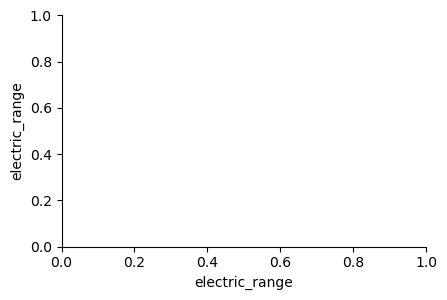

In [19]:
# we have only one numeri column so we get only one pair pot
eda_helper_functions.pair_plots(train)

## Correlation analysis

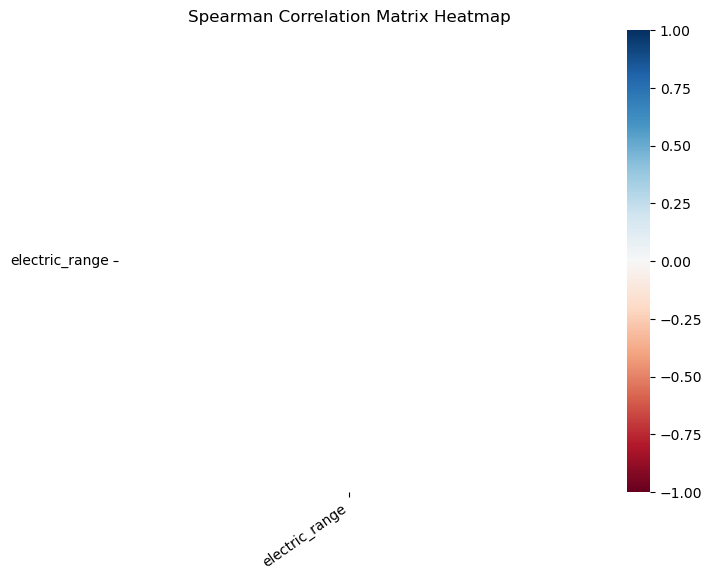

In [21]:
eda_helper_functions.correlation_heatmap(train)

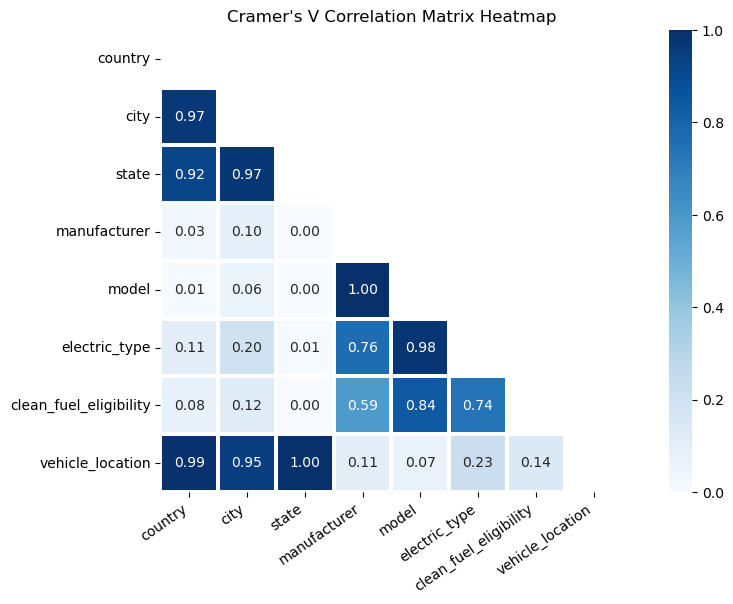

In [22]:
# correlation analysis between all categorical columns
eda_helper_functions.cramersV_heatmap(train)

## Detailed Anlysis

In [24]:
train.columns

Index(['country', 'city', 'state', 'model_year', 'manufacturer', 'model',
       'electric_type', 'clean_fuel_eligibility', 'vehicle_location',
       'electric_range'],
      dtype='object')

## country

**Observations:**

`we have two missing value in country column`

In [26]:
train.country

0         Snohomish
1              King
2              King
3              King
4            Pierce
            ...    
122495         King
122496         King
122497    Snohomish
122498         King
122499         King
Name: country, Length: 122500, dtype: object

In [27]:
# Now we give the summary of country column with the help of eda_helper_functions
eda_helper_functions.cat_summary(train,'country')

0         Snohomish
1              King
2              King
3              King
4            Pierce
            ...    
122495         King
122496         King
122497    Snohomish
122498         King
122499         King
Name: country, Length: 122500, dtype: object

Data Type      : object
Cardinality    : 158 categories
Missing Data   : 2 rows (0.00 %)
Available Data : 122,498 / 122,500 rows


count   122498
unique     158
top       King
freq     63315

count  percentage
category                               
King                  63315    0.516866
Snohomish             14564    0.118892
Pierce                 9584    0.078238
Clark                  7283    0.059454
Thurston               4416    0.036050
Kitsap                 4014    0.032768
Spokane                3219    0.026278
Whatcom                2942    0.024017
Benton                 1452    0.011853
Skagit                 1353    0.011045
Island                 1301    0.010621
Chelan                  749    0.006114
Yakima                  732    0.005976
Clallam                 725    0.005918
Jefferson               673    0.005494
Cowlitz                 636    0.005192
San Juan                627    0.005118
Mason                   596    0.004865
Lewis                   534    0.004359
Kittitas                445    0.003633
Grays Harbor            435    0.003551
Franklin                412    0.003363
Grant                   406    0.003314
Walla Walla             293    0.002392
Whitman                 248    0.002025
Douglas                 242    0.001976
Klickitat               198    0.001616
Okanogan                181    0.001478
Stevens                 167    0.001363
Pacific                 140    0.001143
Skamania                132    0.001078
Asotin                   60    0.000490
Adams                    39    0.000318
Wahkiakum                37    0.000302
Pend Oreille             34    0.000278
Lincoln                  30    0.000245
Ferry                    20    0.000163
San Diego                15    0.000122
Santa Clara               9    0.000073
Fairfax                   9    0.000073
Columbia                  8    0.000065
Orange                    7    0.000057
Montgomery                6    0.000049
Ventura                   6    0.000049
Maricopa                  6    0.000049
Virginia Beach            5    0.000041
Los Angeles               5    0.000041
Cumberland                5    0.000041
Prince William            4    0.000033
Pulaski                   4    0.000033
El Paso                   4    0.000033
Kings                     4    0.000033
Solano                    4    0.000033
Honolulu                  4    0.000033
Anne Arundel              4    0.000033
Monterey                  4    0.000033
Bexar                     3    0.000024
Middlesex                 3    0.000024
Salt Lake                 3    0.000024
San Bernardino            3    0.000024
Stafford                  3    0.000024
Nueces                    3    0.000024
Harnett                   3    0.000024
Essex                     3    0.000024
Harford                   3    0.000024
Lake                      3    0.000024
Autauga                   3    0.000024
Tarrant                   2    0.000016
Calvert                   2    0.000016
DeKalb                    2    0.000016
Marin                     2    0.000016
Garfield                  2    0.000016
Alameda                   2    0.000016
Sonoma                    2    0.000016
Marion                    2    0.000016
Yolo                      2    0.000016
Multnomah                 2    0.000016
Platte                    2    0.000016
District of Columbia      2    0.000016
New Haven                 2    0.000016
Prince George's           2    0.000016
St. Mary's                2    0.000016
Frederick                 2    0.000016
Hillsborough              2    0.000016
Washoe                    2    0.000016
Alexandria                2    0.000016
Cook                      2    0.000016
New London                2    0.000016
Hamilton                  2    0.000016
Riverside                 2    0.000016
Albemarle                 2    0.000016
Harris                    2    0.000016
Shelby                    2    0.000016
Tooele                    2    0.000016
Santa Barbara             1    0.000008
Denton                    1    0.000008
Collin                    1    0.000008
Sarpy                     1    0.000008
Rockingham            

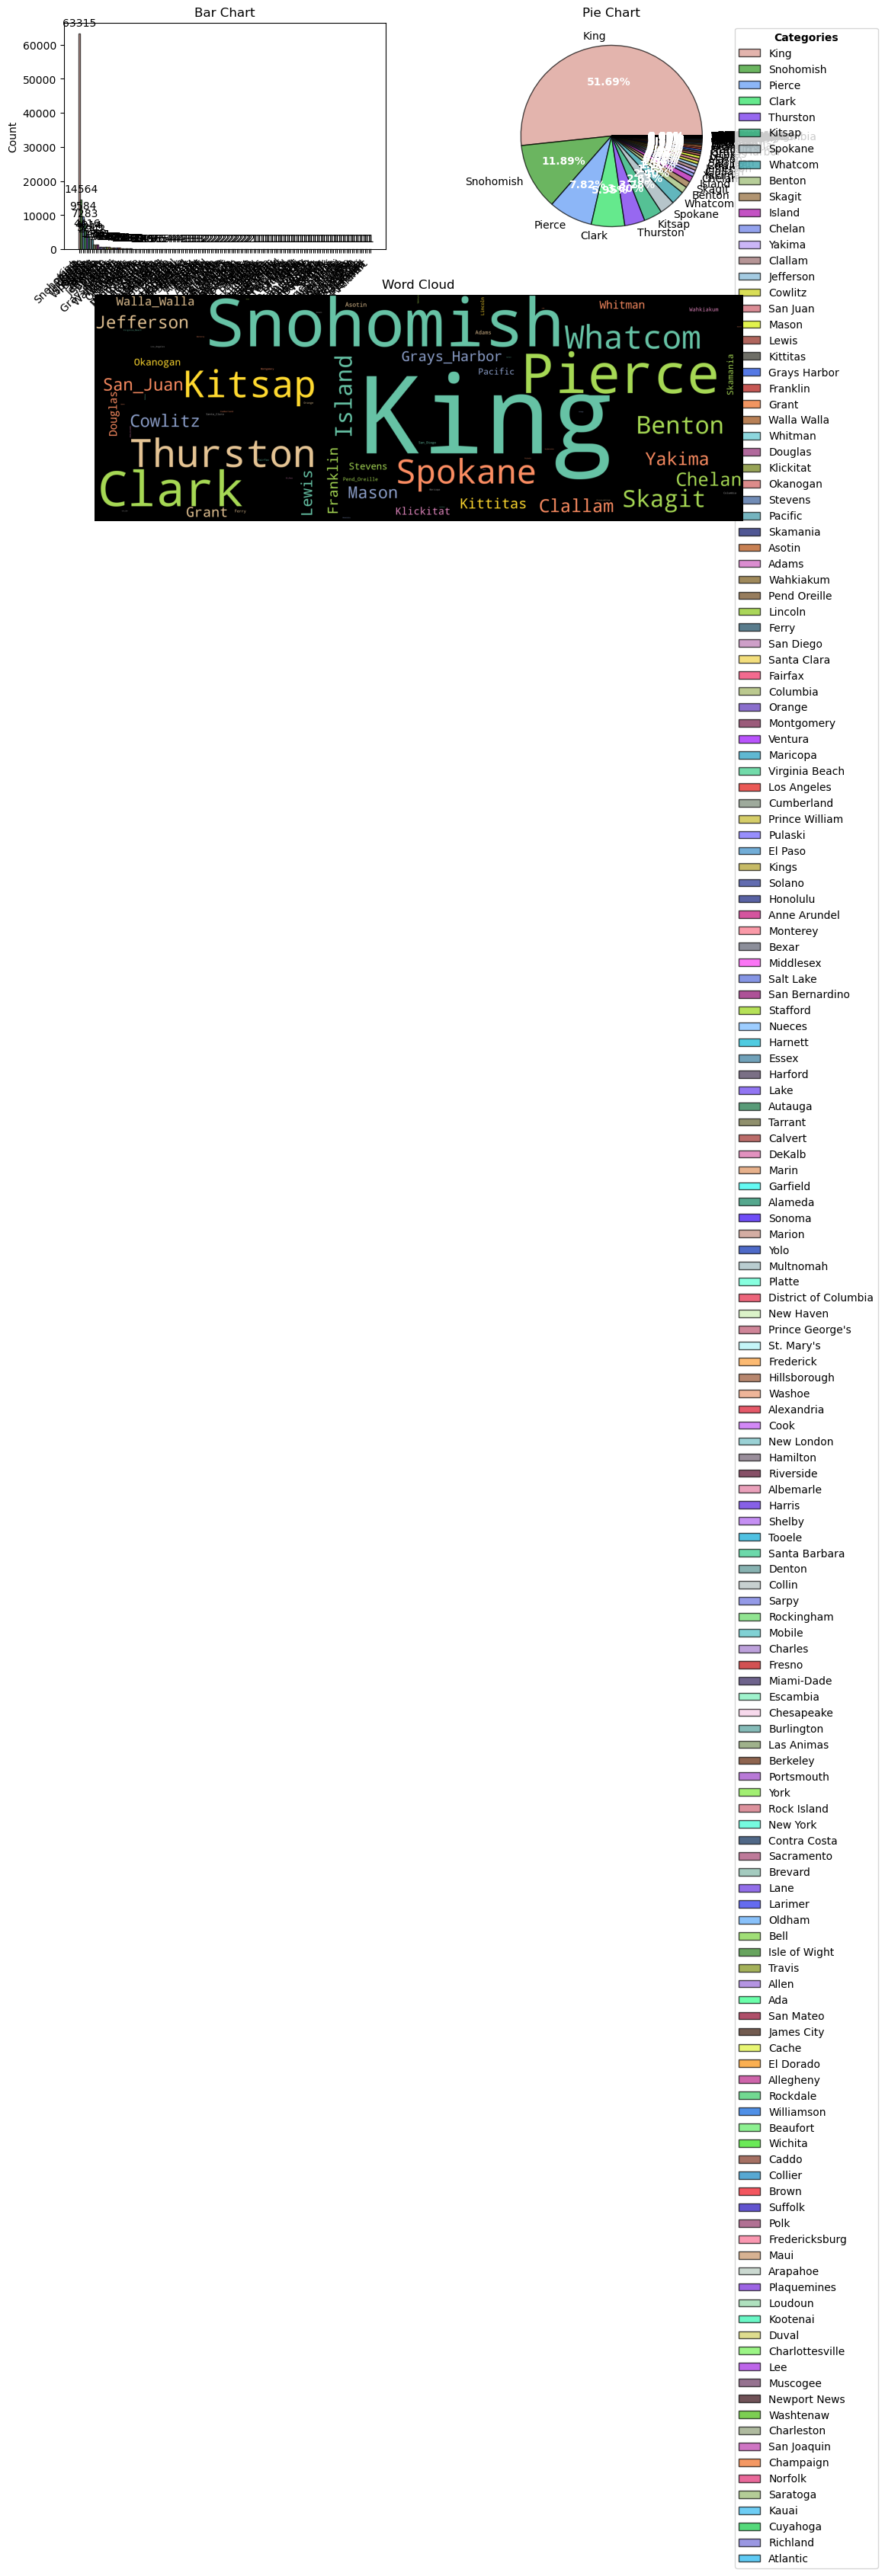

In [28]:
# Now we plot the country column with the help of eda_helper_functions
eda_helper_functions.cat_univar_plots(train,'country')

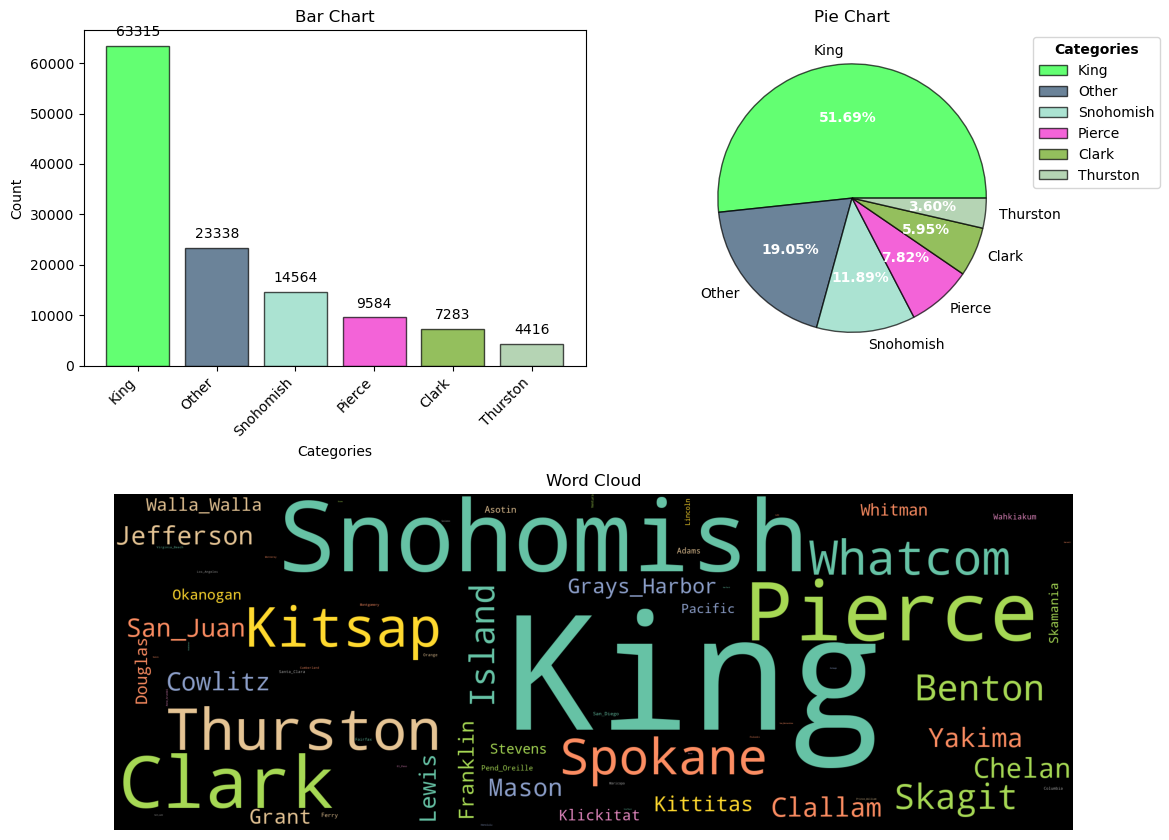

In [29]:
eda_helper_functions.cat_univar_plots(train,'country',k=5)

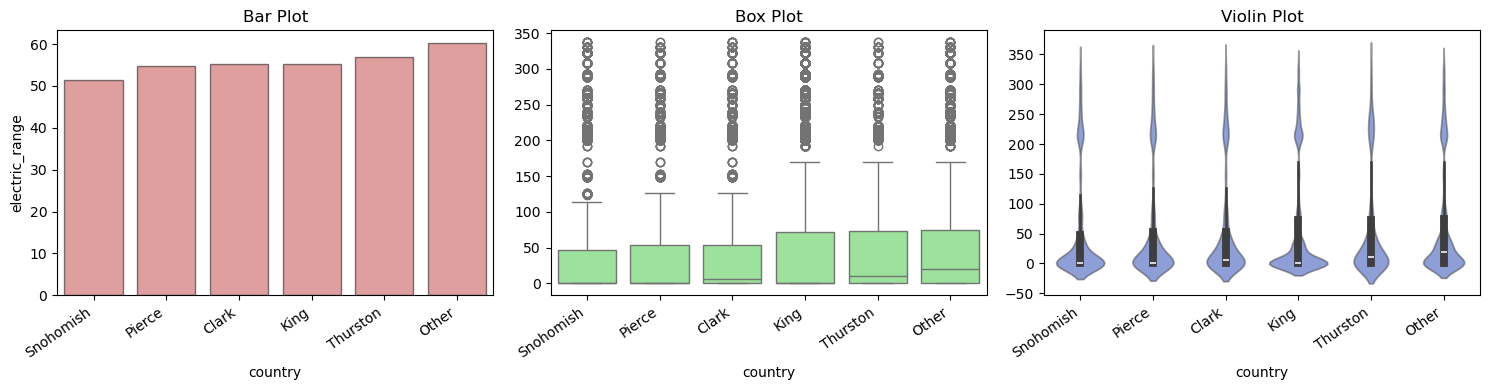

In [30]:
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var='electric_range',
    cat_var='country',
    k =5
)

In [31]:
eda_helper_functions.num_cat_hyp_testing(train,'electric_range','country')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 2.3243581733052436
- p-value              : 1.4716319924688019e-18
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and country are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 960.0347320499093
- p-value              : 1.9838955355891717e-115
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and country are associated to each other


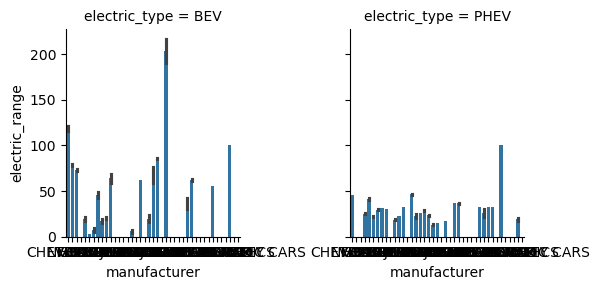

In [32]:
country_grid = sns.FacetGrid(
    data = train,
    col = 'electric_type',
    sharey=True
)
country_grid.map(sns.barplot,'manufacturer','electric_range',order = train.manufacturer.unique())


In [33]:
total_count = train.manufacturer.value_counts().sum()
threshold = 0.03*total_count
threshold

3675.0

In [34]:
def categories(data):
    if manufacturer_counts[data] >=threshold:
        return data
    else:
        return 'other'

manufacturer_counts = train.manufacturer.value_counts()
train['manufacturer'] = train['manufacturer'].apply(categories)

# train.assign(manufacturer=lambda df: df.manufacturer.apply(categories)).manufacturer.unique()


train.manufacturer.unique()

array(['CHEVROLET', 'NISSAN', 'TESLA', 'other', 'BMW', 'FORD', 'TOYOTA',
       'KIA'], dtype=object)

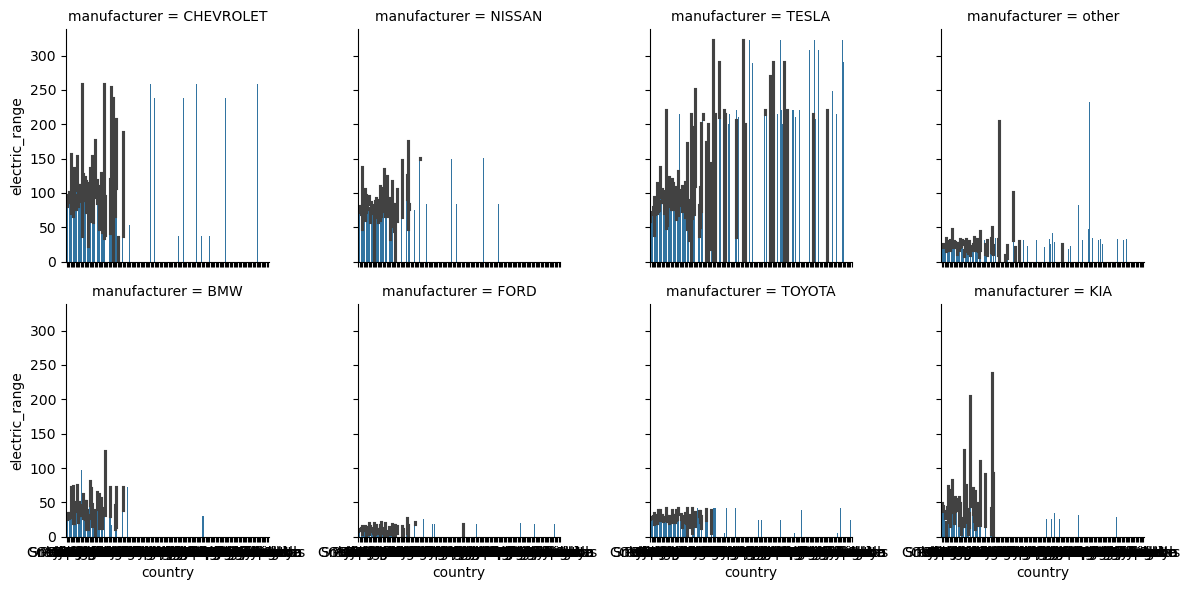

In [35]:
country_grid = sns.FacetGrid(
    data = train,
    col = 'manufacturer',
    col_wrap=4,
    sharey=True
)
country_grid.map(sns.barplot,'country','electric_range',order = train.country.unique())


In [36]:
# train[train.manufacturer=='TOYOTA']

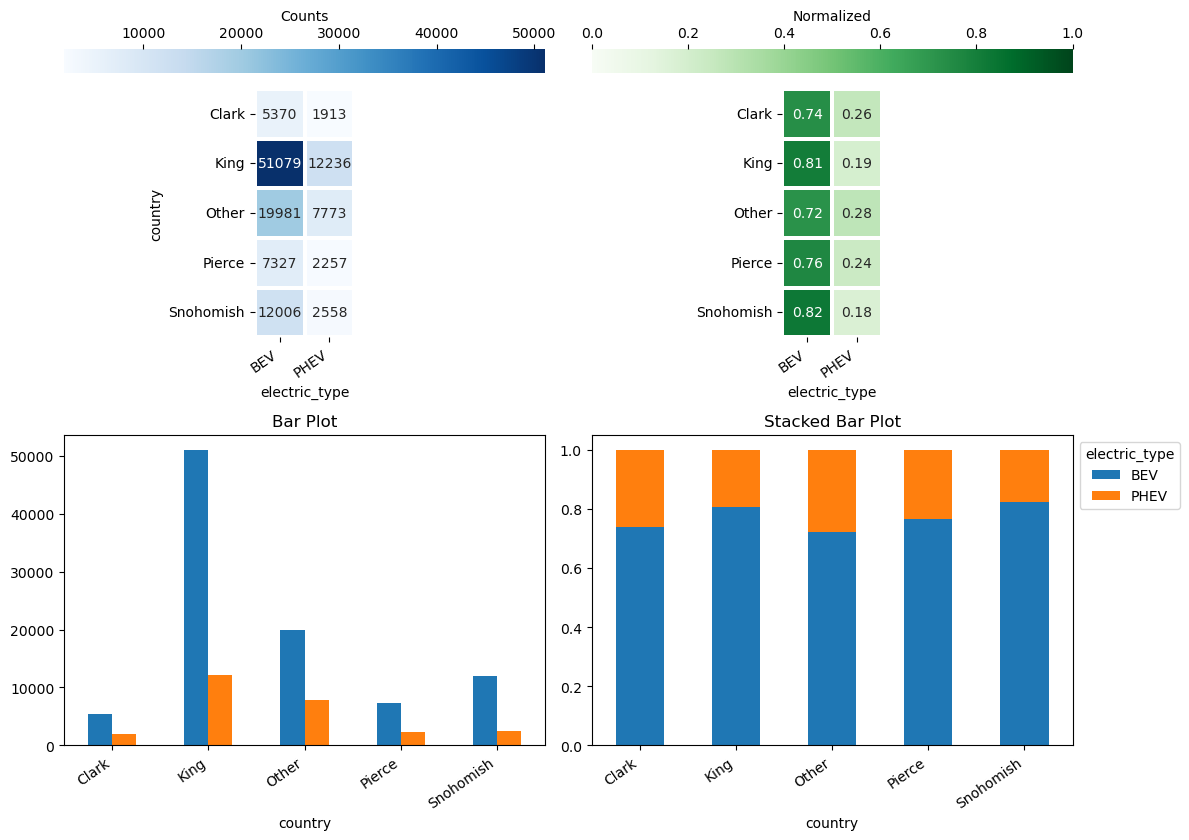

In [37]:
eda_helper_functions.cat_bivar_plots(
    data=train,
    var1='country',
    var2='electric_type',
    k1=4,
    
)

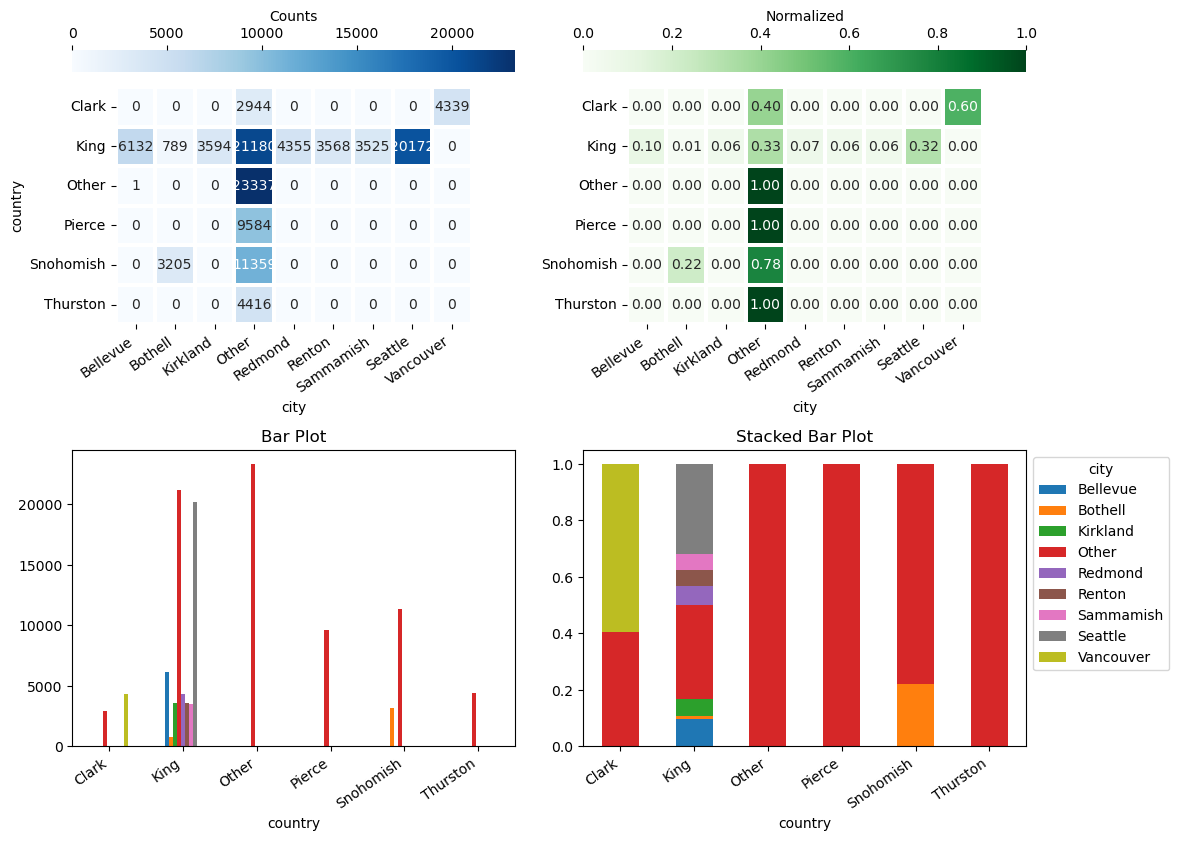

In [38]:
eda_helper_functions.cat_bivar_plots(
    data=train,
    var1='country',
    var2='city',
    k1=5,
    k2=8
    
)

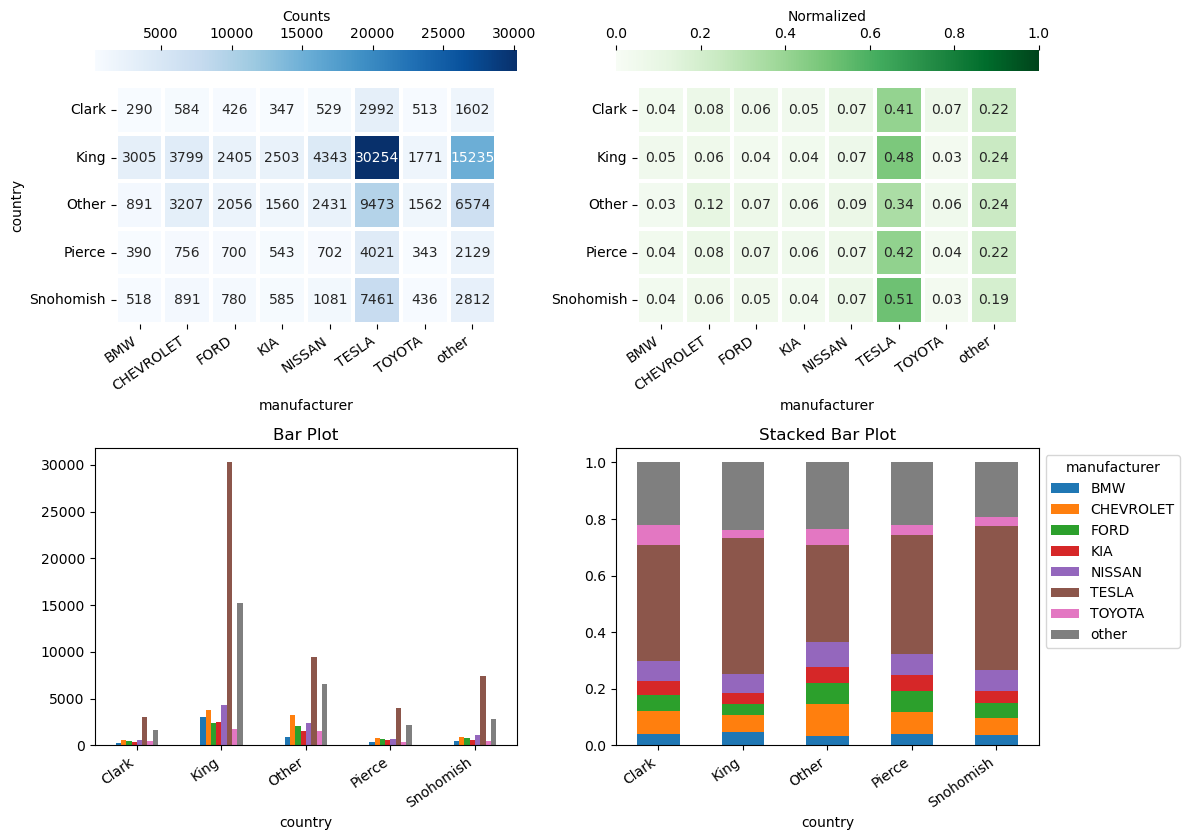

In [39]:
eda_helper_functions.cat_bivar_plots(
    data=train,
    var1='country',
    var2='manufacturer',
    k1=4,
    
)

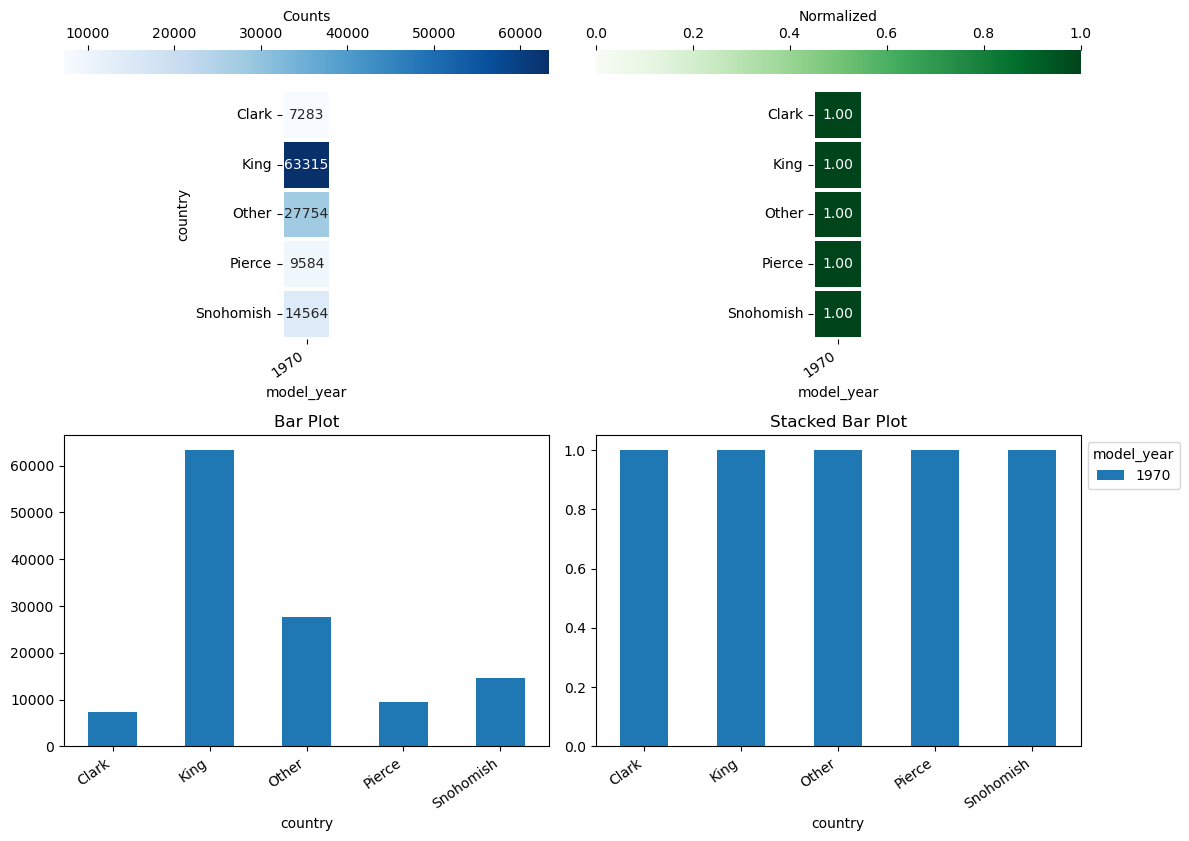

In [40]:
eda_helper_functions.cat_bivar_plots(
    data=train,
    var1='country',
    var2='model_year',
    k1=4,
    
)

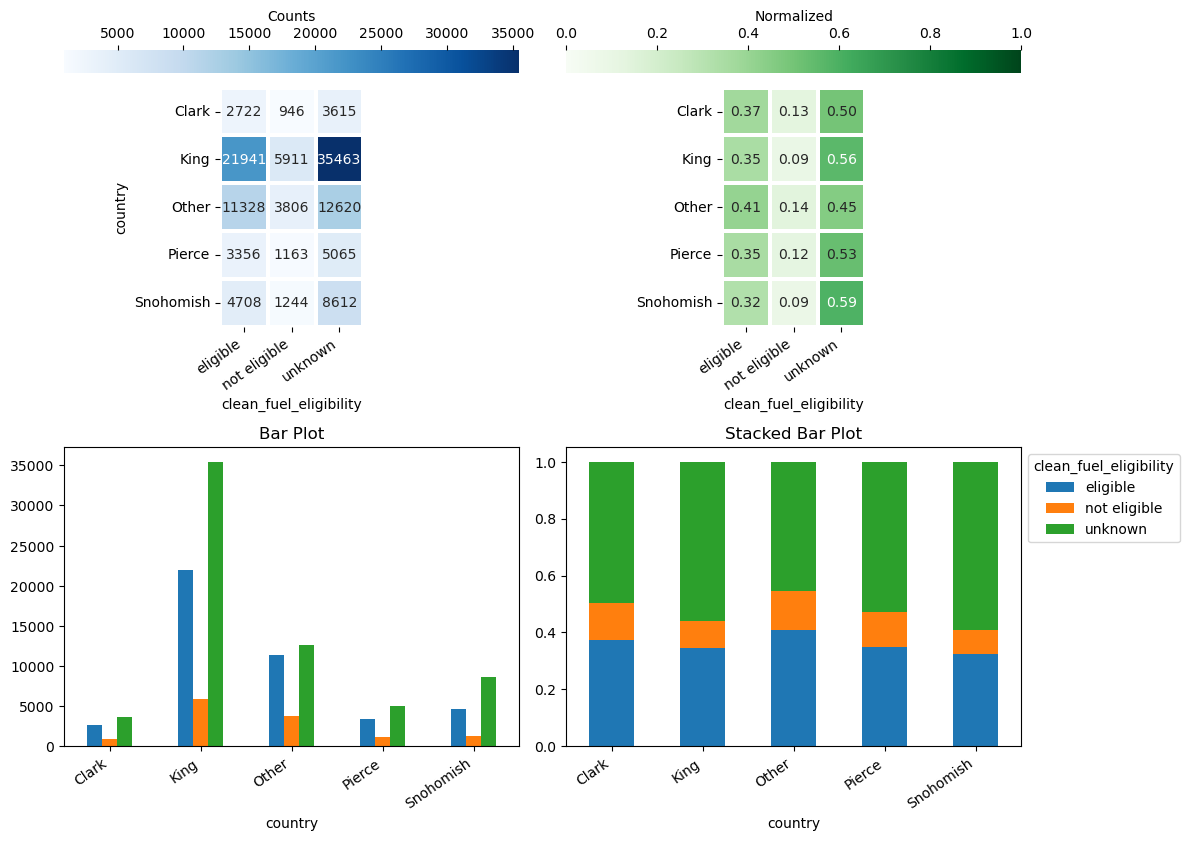

In [41]:
eda_helper_functions.cat_bivar_plots(
    data=train,
    var1='country',
    var2='clean_fuel_eligibility',
    k1=4,
    
)

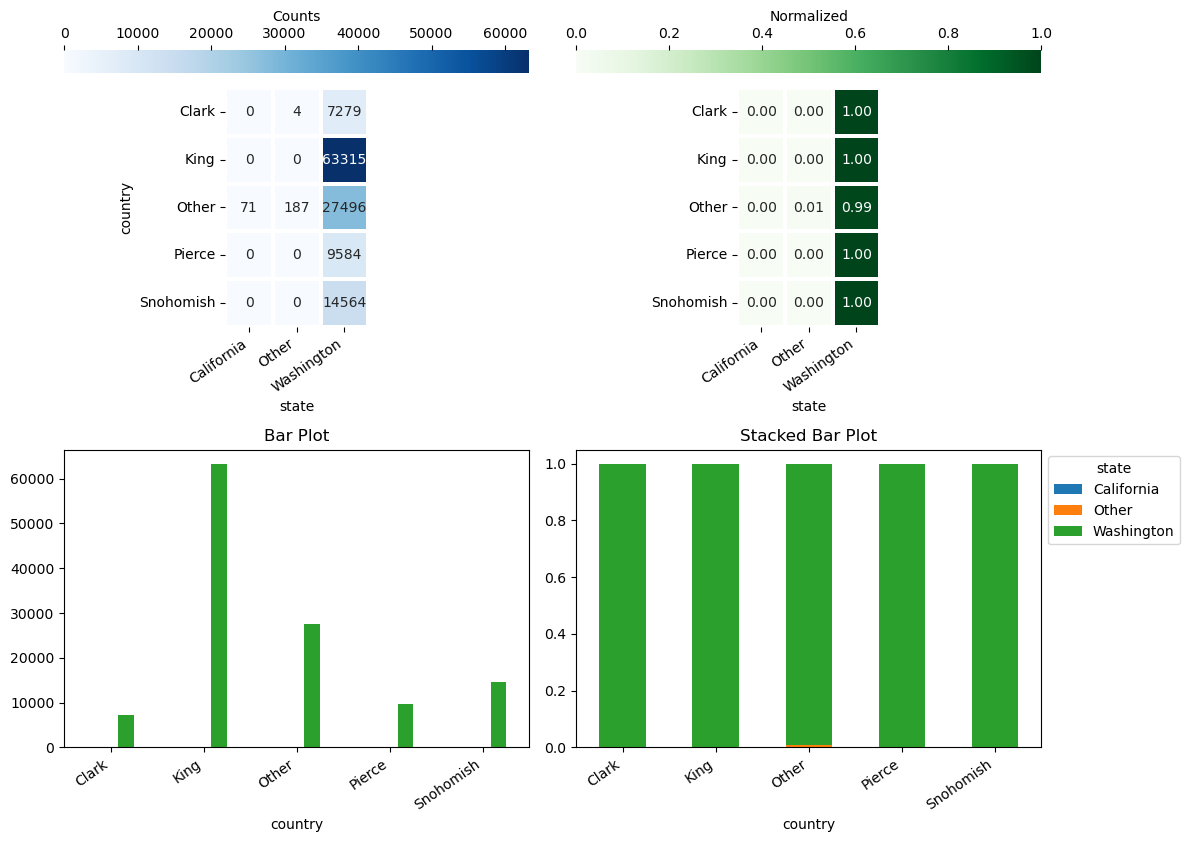

In [42]:
eda_helper_functions.cat_bivar_plots(
    data=train,
    var1='country',
    var2='state',
    k1=4,
    k2=2
    
    
)

## city

In [44]:
train.city

0           Edmonds
1          Kirkland
2           Kenmore
3         Sammamish
4            Tacoma
            ...    
122495      Seattle
122496      Seattle
122497      Everett
122498     Kirkland
122499      Seattle
Name: city, Length: 122500, dtype: object

In [45]:
eda_helper_functions.cat_summary(train,'city')

0           Edmonds
1          Kirkland
2           Kenmore
3         Sammamish
4            Tacoma
            ...    
122495      Seattle
122496      Seattle
122497      Everett
122498     Kirkland
122499      Seattle
Name: city, Length: 122500, dtype: object

Data Type      : object
Cardinality    : 647 categories
Missing Data   : 2 rows (0.00 %)
Available Data : 122,498 / 122,500 rows


count    122498
unique      647
top     Seattle
freq      20172

count  percentage
category                                   
Seattle                   20172    0.164672
Bellevue                   6133    0.050066
Redmond                    4355    0.035552
Vancouver                  4339    0.035421
Bothell                    3994    0.032605
Kirkland                   3594    0.029339
Renton                     3568    0.029127
Sammamish                  3525    0.028776
Olympia                    2938    0.023984
Tacoma                     2504    0.020441
Tukwila                    2072    0.016915
Bellingham                 2028    0.016555
Kent                       1948    0.015902
Issaquah                   1890    0.015429
Spokane                    1866    0.015233
Lynnwood                   1856    0.015151
Everett                    1710    0.013959
Mercer Island              1610    0.013143
Woodinville                1606    0.013110
Snohomish                  1464    0.011951
Shoreline                  1374    0.011217
Gig Harbor                 1364    0.011135
Edmonds                    1317    0.010751
Auburn                     1299    0.010604
Bainbridge Island          1189    0.009706
Camas                      1098    0.008963
Maple Valley               1031    0.008416
Federal Way                 985    0.008041
Puyallup                    950    0.007755
Lake Stevens                944    0.007706
Bremerton                   915    0.007470
Marysville                  889    0.007257
Seatac                      783    0.006392
Port Orchard                733    0.005984
Kenmore                     717    0.005853
Bonney Lake                 687    0.005608
Ridgefield                  644    0.005257
Lacey                       625    0.005102
Newcastle                   621    0.005069
Snoqualmie                  613    0.005004
Burien                      603    0.004923
Richland                    602    0.004914
Kennewick                   591    0.004825
Mukilteo                    545    0.004449
Monroe                      533    0.004351
Spokane Valley              523    0.004269
Lakewood                    520    0.004245
North Bend                  497    0.004057
Yakima                      496    0.004049
Mill Creek                  491    0.004008
University Place            489    0.003992
Poulsbo                     482    0.003935
Anacortes                   476    0.003886
Mount Vernon                464    0.003788
Tumwater                    459    0.003747
Lake Forest Park            449    0.003665
Vashon                      442    0.003608
Port Townsend               432    0.003527
Sequim                      420    0.003429
Battle Ground               412    0.003363
Washougal                   402    0.003282
Duvall                      401    0.003274
Pasco                       395    0.003225
South Hill                  382    0.003118
Covington                   371    0.003029
Arlington                   361    0.002947
Des Moines                  340    0.002776
Camano Island               331    0.002702
Mountlake Terrace           313    0.002555
Oak Harbor                  309    0.002522
Stanwood                    306    0.002498
Wenatchee                   302    0.002465
Port Angeles                296    0.002416
Shelton                     292    0.002384
Friday Harbor               285    0.002327
Spanaway                    284    0.002318
Blaine                      266    0.002171
Graham                      257    0.002098
Longview                    253    0.002065
Carnation                   251    0.002049
Silverdale                  244    0.001992
Ferndale                    243    0.001984
Enumclaw                    242    0.001976
Lake Tapps                  239    0.001951
Walla Walla                 236    0.001927
Black Diamond               236    0.001927
Centralia                   224    0.001829
Moses Lake                  220    0.001796
Medina                      216    0.001763
Brush Prairie         

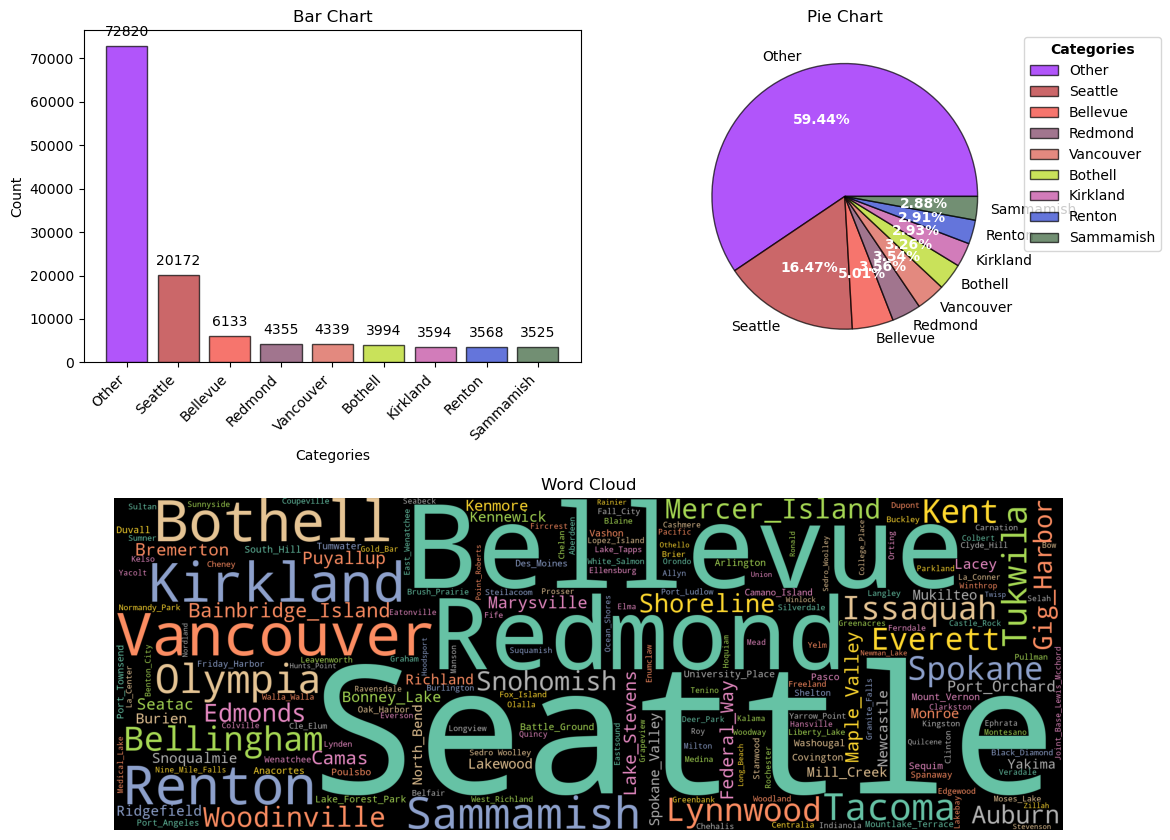

In [46]:
eda_helper_functions.cat_univar_plots(train,'city',k=8)

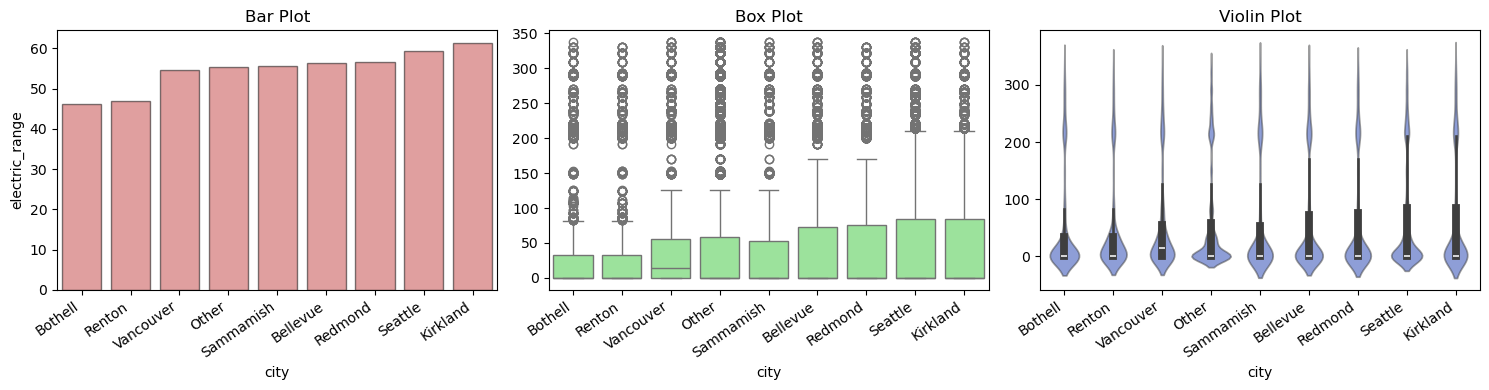

In [47]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var='electric_range',
    cat_var='city',
    k=8
)

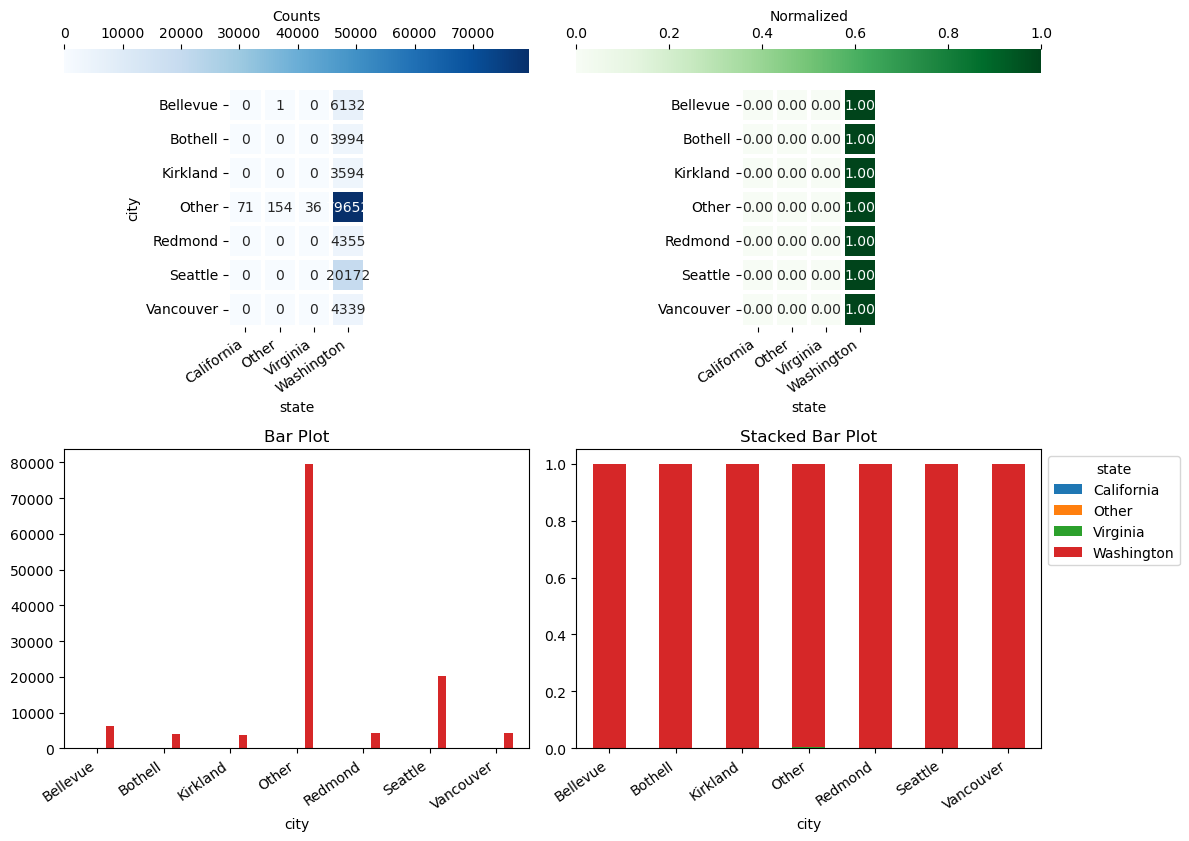

In [48]:
eda_helper_functions.cat_bivar_plots(train,'city','state',k1=6,k2=3)

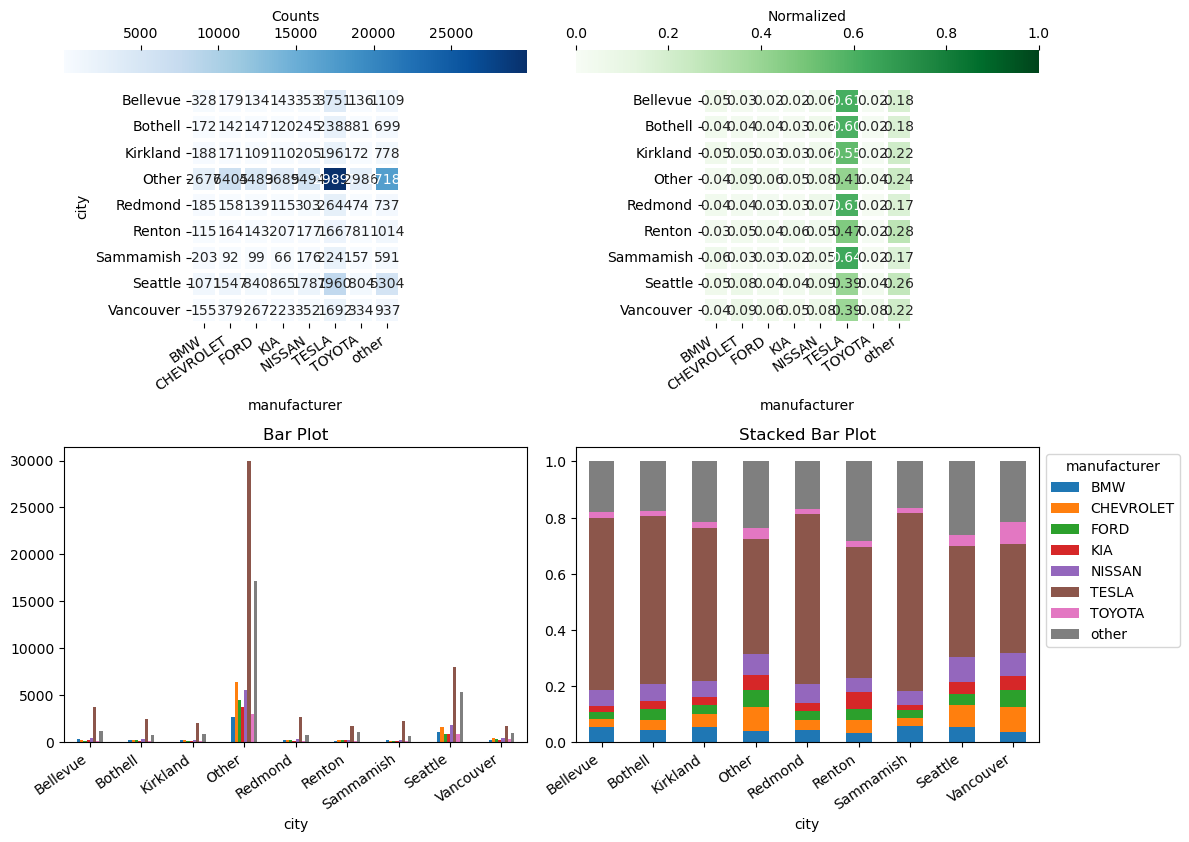

In [49]:
eda_helper_functions.cat_bivar_plots(train,'city','manufacturer',k1=8)

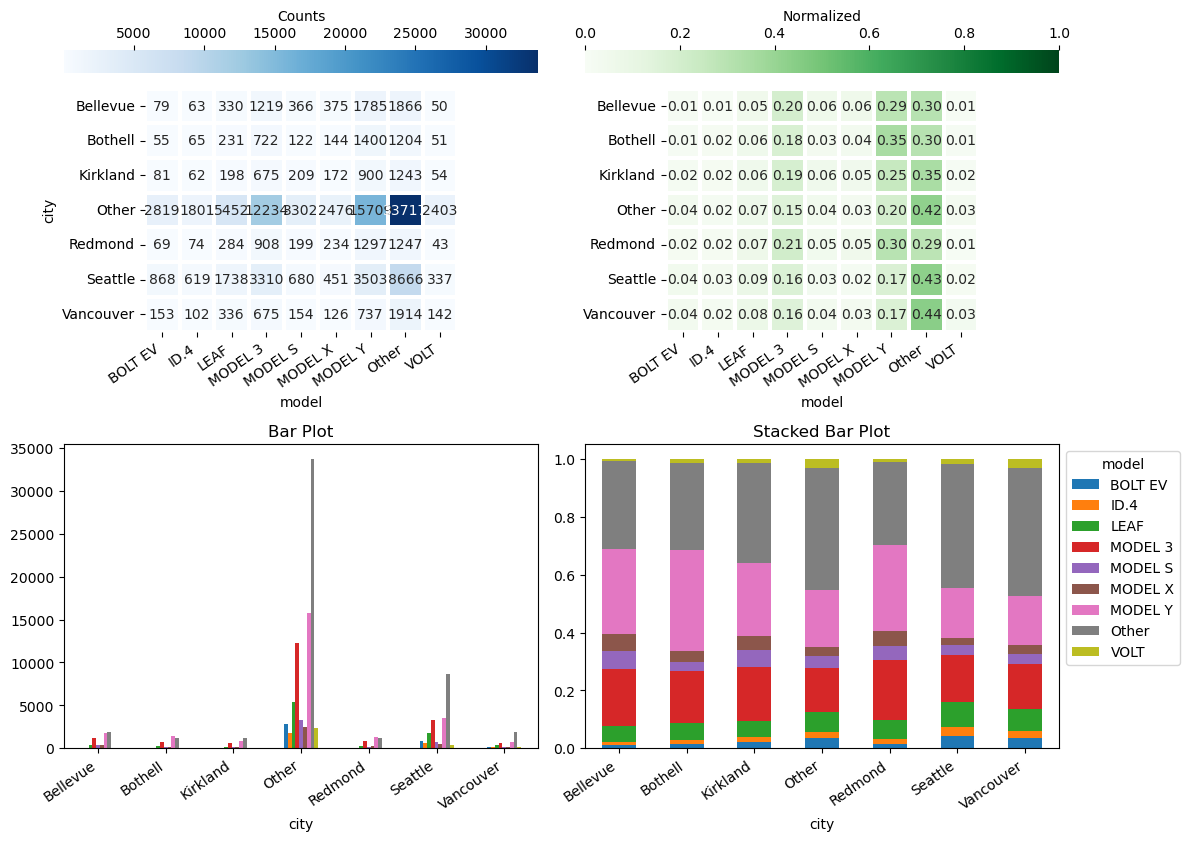

In [50]:
eda_helper_functions.cat_bivar_plots(train,'city','model',k1=6,k2=8)

In [51]:
train.model.value_counts()

model
MODEL Y           25331
MODEL 3           19743
LEAF               8569
MODEL S            5032
BOLT EV            4124
                  ...  
750E                  1
745LE                 1
BENTAYGA              1
PROMASTER 3500        1
FLYING SPUR           1
Name: count, Length: 145, dtype: int64

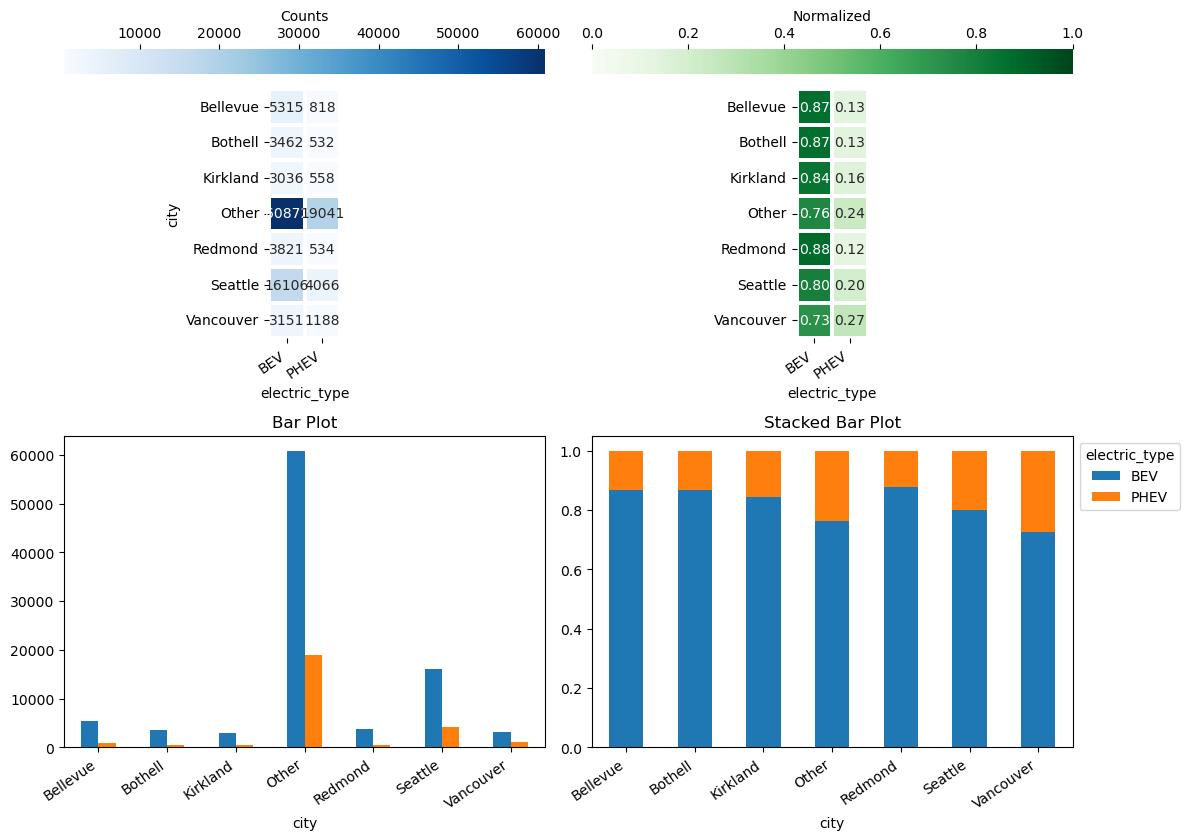

In [52]:
eda_helper_functions.cat_bivar_plots(train,'city','electric_type',k1=6)

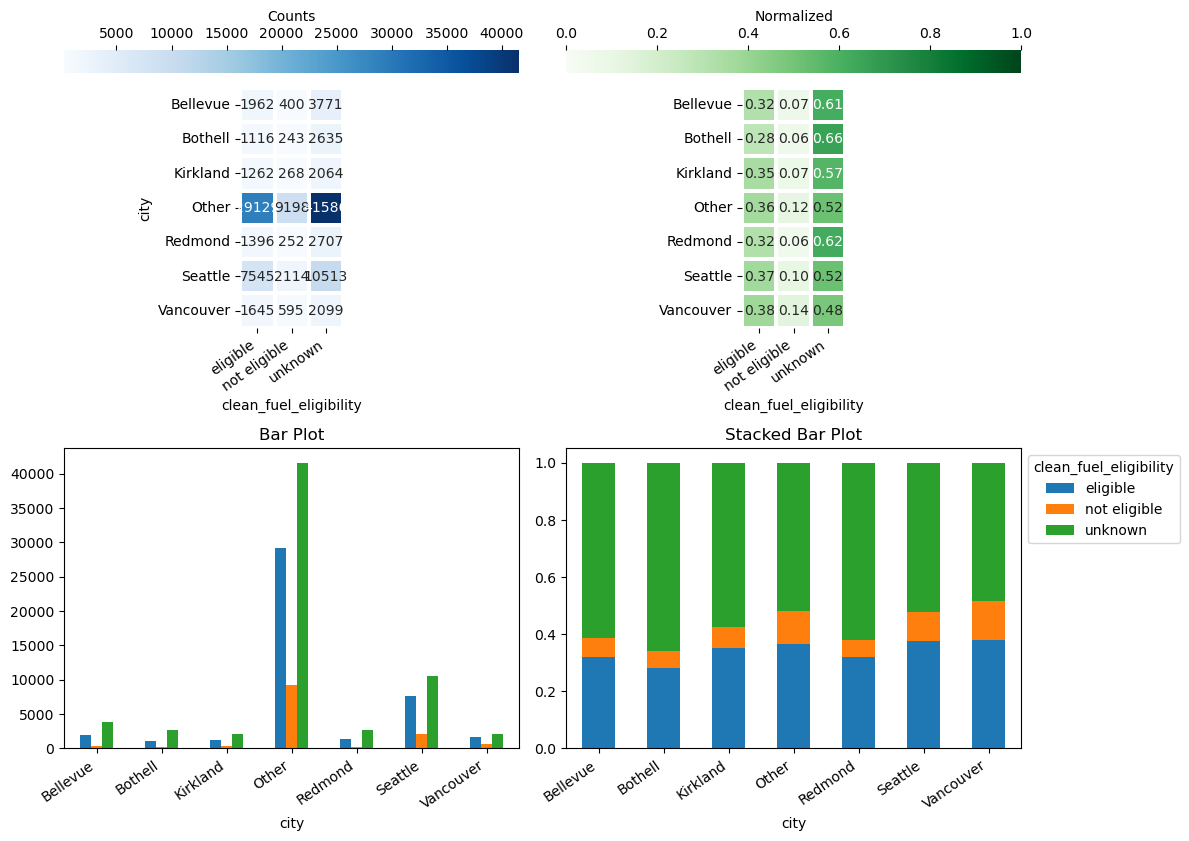

In [53]:
eda_helper_functions.cat_bivar_plots(train,'city','clean_fuel_eligibility',k1=6)

In [54]:
eda_helper_functions.num_cat_hyp_testing(train,'electric_range','city')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 2.394437647671414
- p-value              : 6.240743817266297e-75
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and city are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2265.8176110444333
- p-value              : 1.7371814946315882e-178
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and city are associated to each other


In [55]:
eda_helper_functions.hyp_cat_cat(train,'city','country')

- Cramers V            : 0.9671069746142774
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 18066153.251628023
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and country are correlated


In [56]:
eda_helper_functions.hyp_cat_cat(train,'city','electric_type')

- Cramers V            : 0.19733815626315224
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 5416.326066111065
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and electric_type are correlated


In [57]:
eda_helper_functions.hyp_cat_cat(train,'city','model')

- Cramers V            : 0.05635500176882387
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 148980.62202638533
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and model are correlated


In [58]:
eda_helper_functions.hyp_cat_cat(train,'city','clean_fuel_eligibility')

- Cramers V            : 0.12247874654081538
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 4967.146160141676
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and clean_fuel_eligibility are correlated


In [59]:
eda_helper_functions.hyp_cat_cat(train,'city','manufacturer')

- Cramers V            : 0.12379577802223143
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 17662.597326827246
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and manufacturer are correlated


In [60]:
eda_helper_functions.hyp_cat_cat(train,'city','model')

- Cramers V            : 0.05635500176882387
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 148980.62202638533
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and model are correlated


In [61]:
eda_helper_functions.hyp_cat_cat(train,'city','electric_type')

- Cramers V            : 0.19733815626315224
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 5416.326066111065
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and electric_type are correlated


In [62]:
eda_helper_functions.hyp_cat_cat(train,'city','clean_fuel_eligibility')

- Cramers V            : 0.12247874654081538
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 4967.146160141676
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables city and clean_fuel_eligibility are correlated


## state

In [64]:
eda_helper_functions.cat_summary(train,'state')

0         Washington
1         Washington
2         Washington
3         Washington
4         Washington
             ...    
122495    Washington
122496    Washington
122497    Washington
122498    Washington
122499    Washington
Name: state, Length: 122500, dtype: object

Data Type      : object
Cardinality    : 38 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 122,500 / 122,500 rows


count       122500
unique          38
top     Washington
freq        122238

count  percentage
category                                
Washington            122238    0.997861
California                71    0.000580
Virginia                  36    0.000294
Maryland                  22    0.000180
Taxas                     18    0.000147
Florida                    8    0.000065
Alabama                    7    0.000057
North Carolina             7    0.000057
Arizona                    6    0.000049
Utah                       6    0.000049
Nevada                     6    0.000049
ILLINOIS                   6    0.000049
Hawaii                     6    0.000049
Colorado                   5    0.000041
New Jersey                 5    0.000041
Oregon                     5    0.000041
New York                   4    0.000033
Missouri                   4    0.000033
Connecticut                4    0.000033
South Carolina             4    0.000033
Georgia                    4    0.000033
Pennsylvania               3    0.000024
Ohio                       3    0.000024
Massachusetts              3    0.000024
Idaho                      2    0.000016
Indiana                    2    0.000016
Louisiana                  2    0.000016
District of Columbia       2    0.000016
Arkansas                   2    0.000016
New Hampshire              1    0.000008
Iowa                       1    0.000008
Kentucky                   1    0.000008
Nebraska                   1    0.000008
Michigan                   1    0.000008
Oklahoma                   1    0.000008
Wisconsin                  1    0.000008
Africa                     1    0.000008
British Columbia           1    0.000008

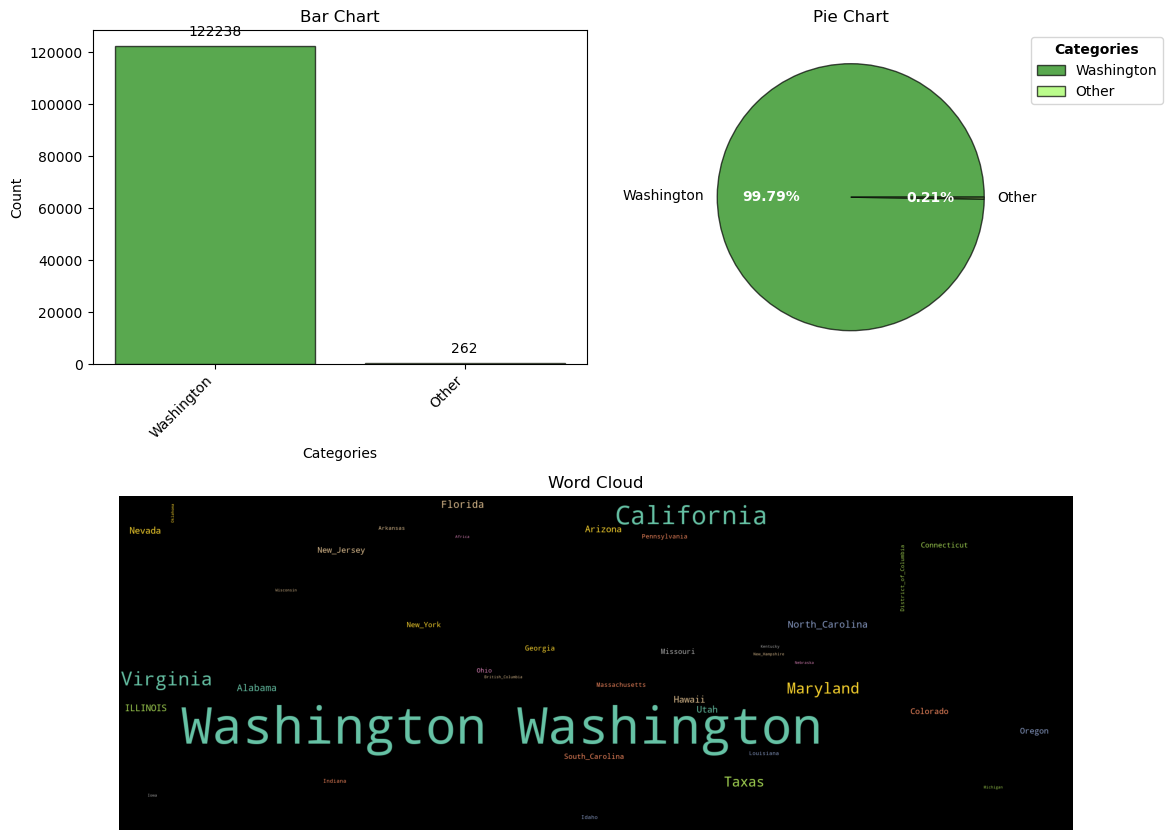

In [65]:
eda_helper_functions.cat_univar_plots(train,'state',k=1)

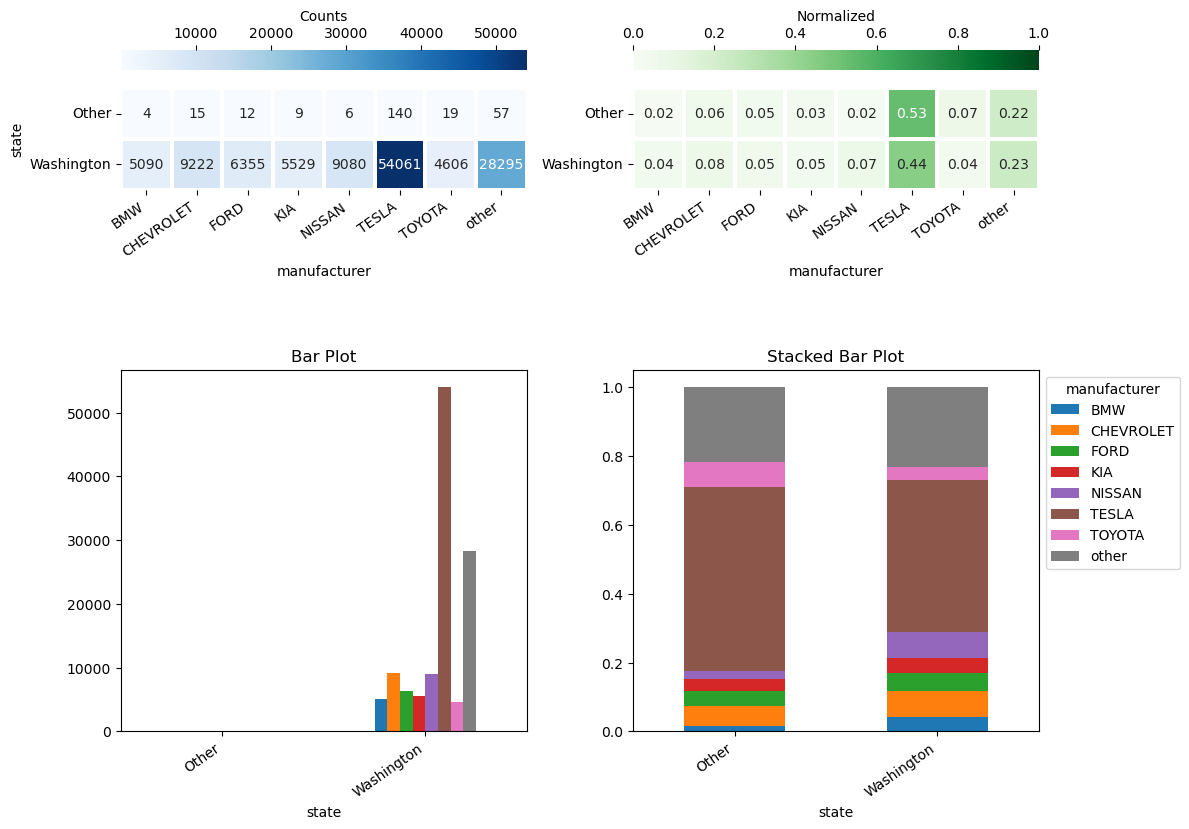

In [66]:
eda_helper_functions.cat_bivar_plots(train,'state','manufacturer',k1=1)

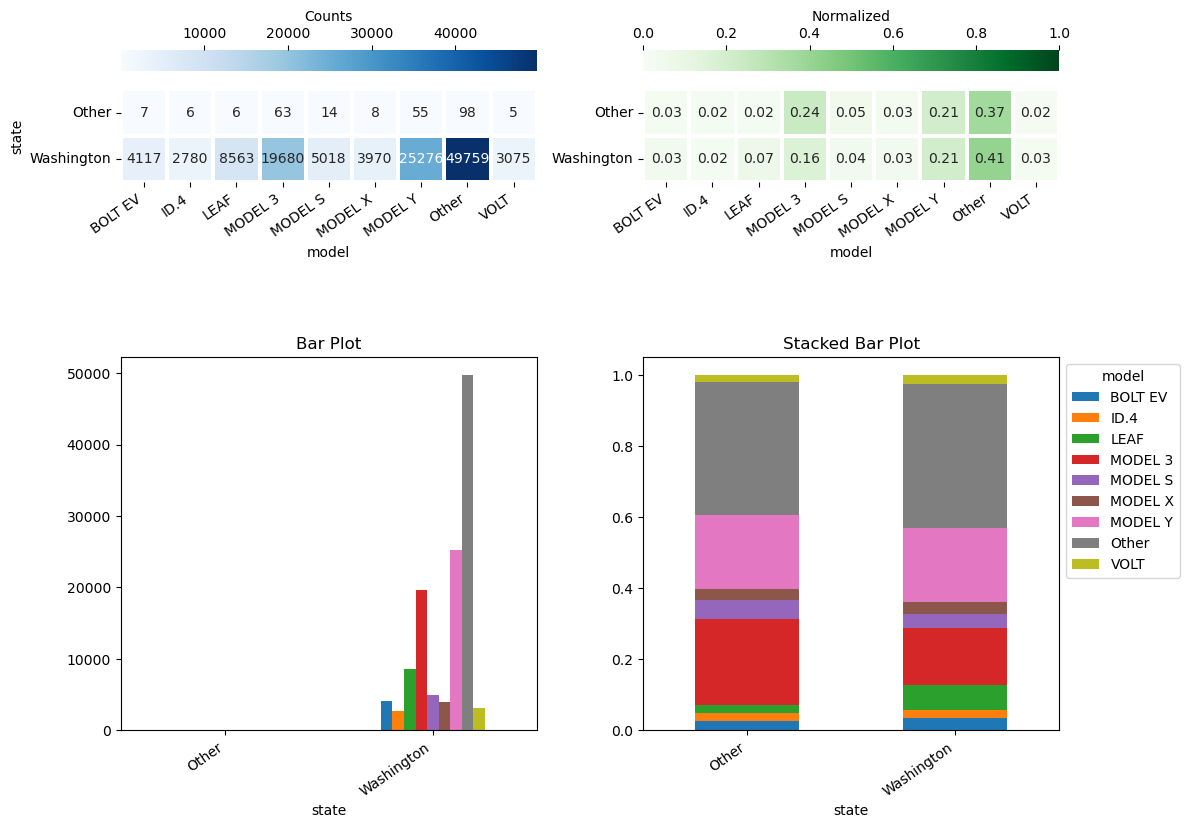

In [67]:
eda_helper_functions.cat_bivar_plots(train,'state','model',k1=1,k2=8)

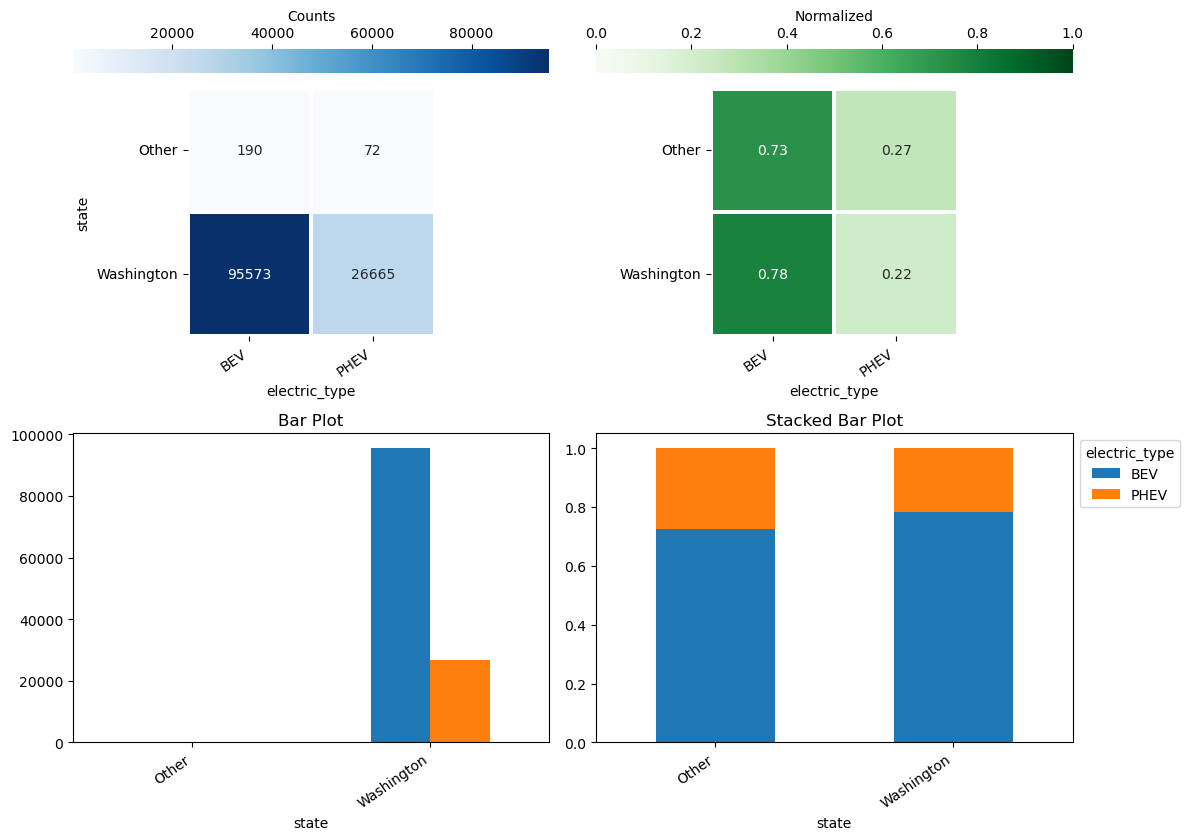

In [68]:
eda_helper_functions.cat_bivar_plots(train,'state','electric_type',k1=1)

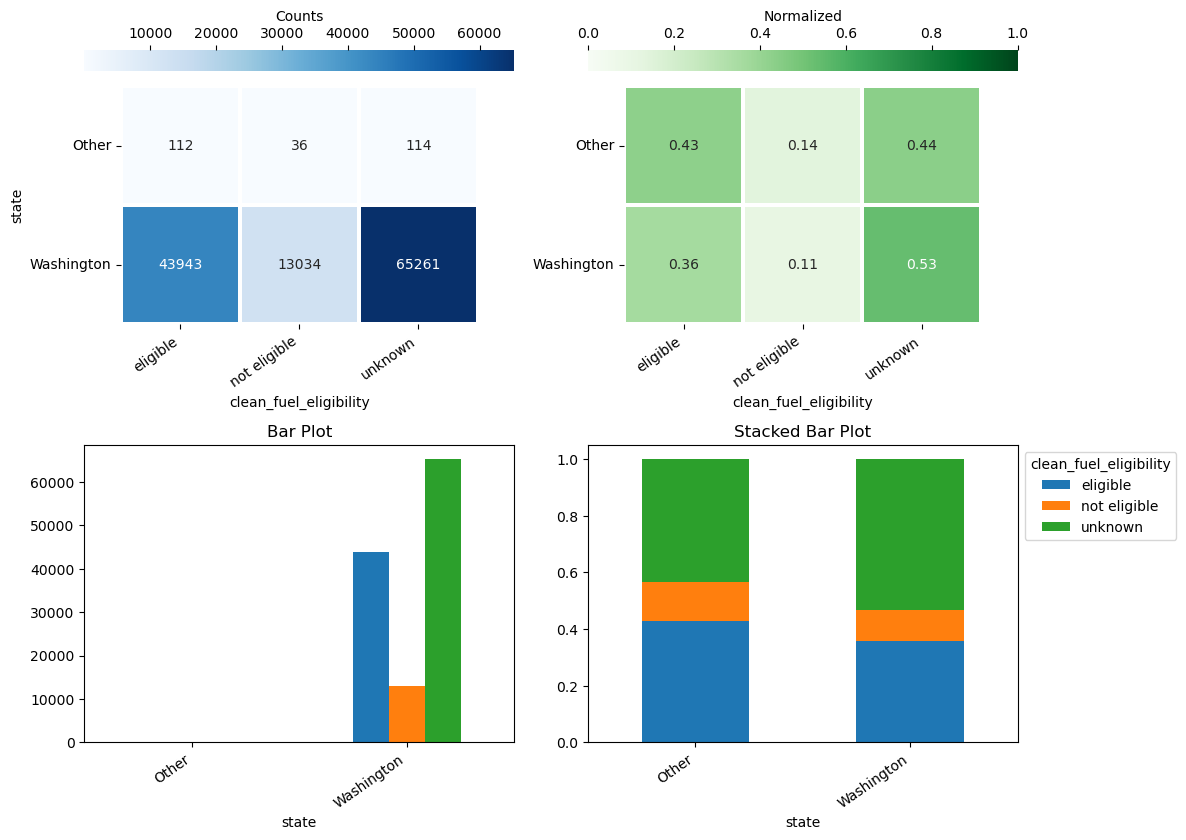

In [69]:
eda_helper_functions.cat_bivar_plots(train,'state','clean_fuel_eligibility',k1=1)

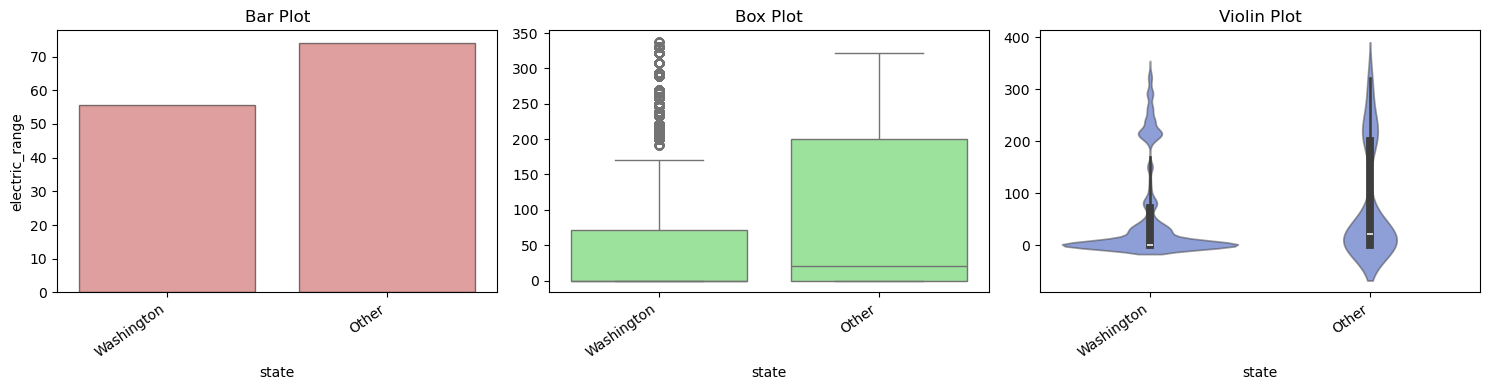

In [70]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var = 'electric_range',
    cat_var='state',
    k=1
)

In [71]:
eda_helper_functions.hyp_cat_cat(train,'state','manufacturer')

- Cramers V            : 0.005132952474727833
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 281.5935482295317
- p-value              : 0.16003526921417283
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables state and manufacturer are uncorrelated


In [72]:
eda_helper_functions.hyp_cat_cat(train,'state','model')

- Cramers V            : 0.0
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 3146.3368623832325
- p-value              : 1.0
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables state and model are uncorrelated


In [73]:
eda_helper_functions.hyp_cat_cat(train,'state','electric_type')

- Cramers V            : 0.009039169452714983
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 47.00927692440532
- p-value              : 0.12536211328263053
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables state and electric_type are uncorrelated


In [74]:
eda_helper_functions.hyp_cat_cat(train,'state','clean_fuel_eligibility')

- Cramers V            : 0.001400040156321644
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 74.48082379368194
- p-value              : 0.4624578537176834
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables state and clean_fuel_eligibility are uncorrelated


In [75]:
eda_helper_functions.hyp_cat_cat(train,'state','city')

- Cramers V            : 0.9699513953961346
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 4055096.3109589685
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables state and city are correlated


In [76]:
eda_helper_functions.hyp_cat_cat(train,'state','country')

- Cramers V            : 0.9222233583181004
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 3650894.912398744
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables state and country are correlated


In [77]:
eda_helper_functions.num_cat_hyp_testing(train,'electric_range','state')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 2.1954631811549397
- p-value              : 3.72891687162276e-05
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and state are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 54.7113970548055
- p-value              : 0.030428248236356013
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and state are associated to each other


## manufacturer

In [79]:
eda_helper_functions.cat_summary(train,'manufacturer')

0         CHEVROLET
1            NISSAN
2             TESLA
3             TESLA
4             TESLA
            ...    
122495        TESLA
122496          BMW
122497        TESLA
122498        TESLA
122499        TESLA
Name: manufacturer, Length: 122500, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 122,500 / 122,500 rows


count   122500
unique       8
top      TESLA
freq     54201

count  percentage
category                    
TESLA      54201    0.442457
other      28352    0.231445
CHEVROLET   9237    0.075404
NISSAN      9086    0.074171
FORD        6367    0.051976
KIA         5538    0.045208
BMW         5094    0.041584
TOYOTA      4625    0.037755

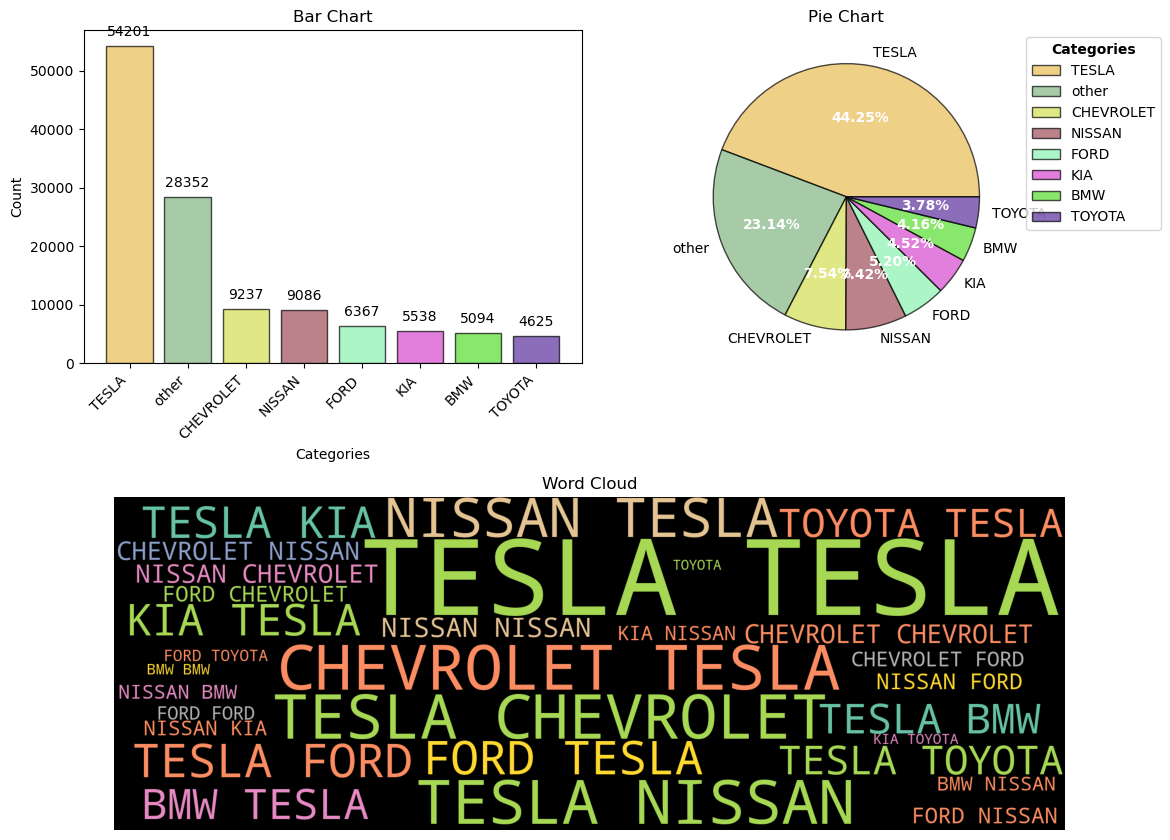

In [80]:
eda_helper_functions.cat_univar_plots(train,'manufacturer')

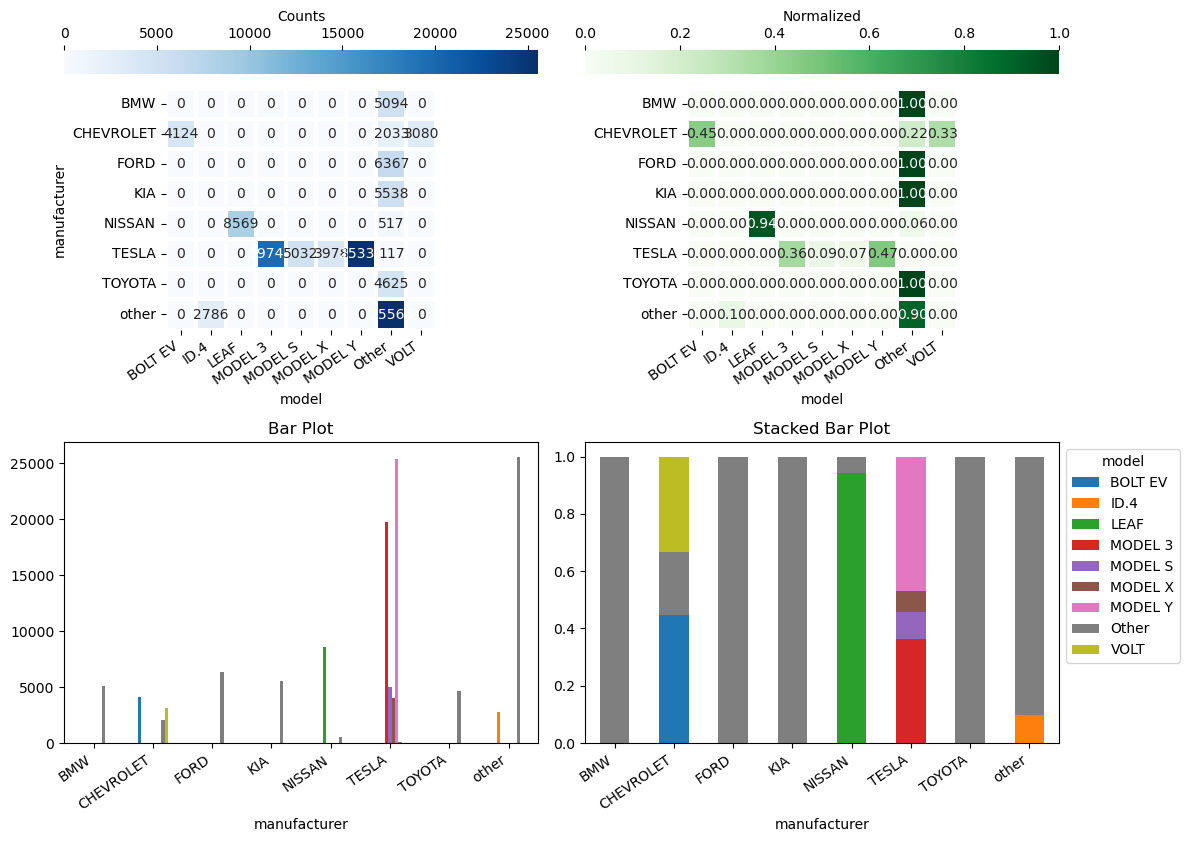

In [81]:
eda_helper_functions.cat_bivar_plots(train,'manufacturer','model',k2=8)

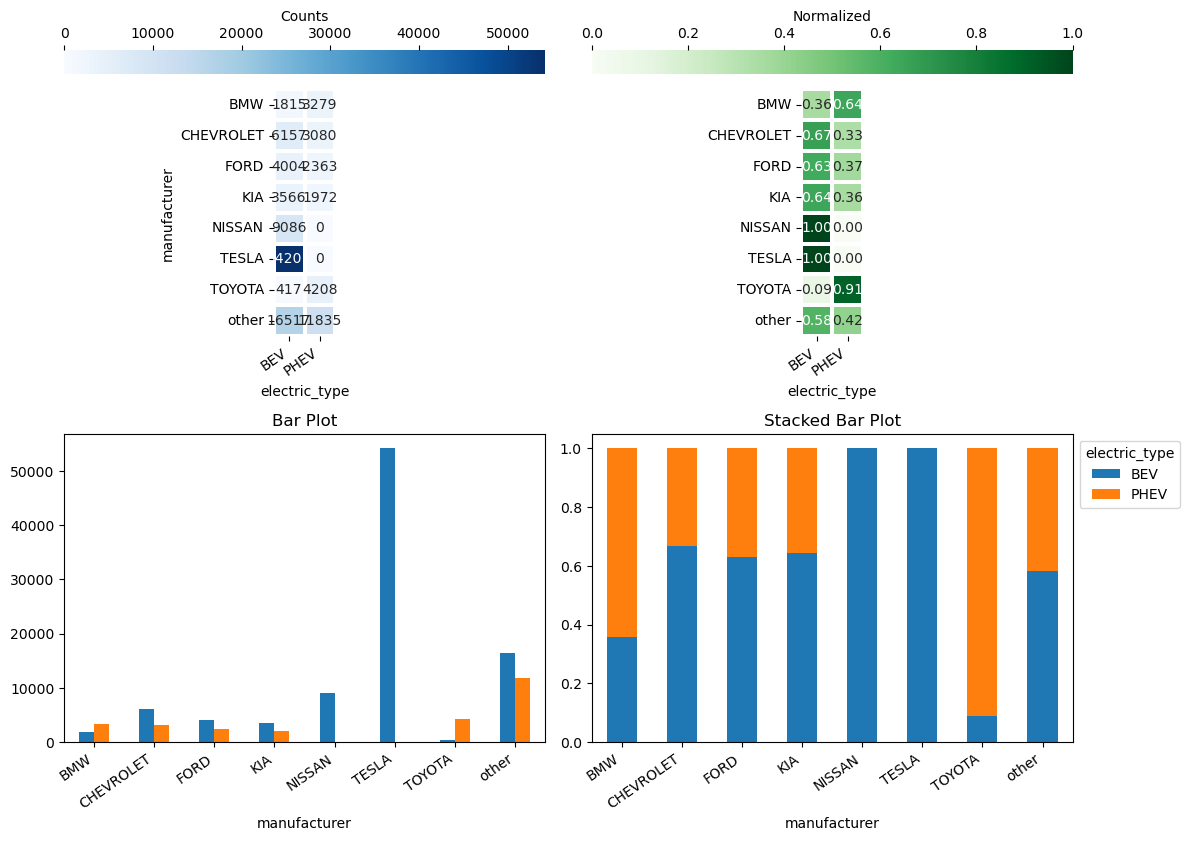

In [82]:
eda_helper_functions.cat_bivar_plots(train,'manufacturer','electric_type')

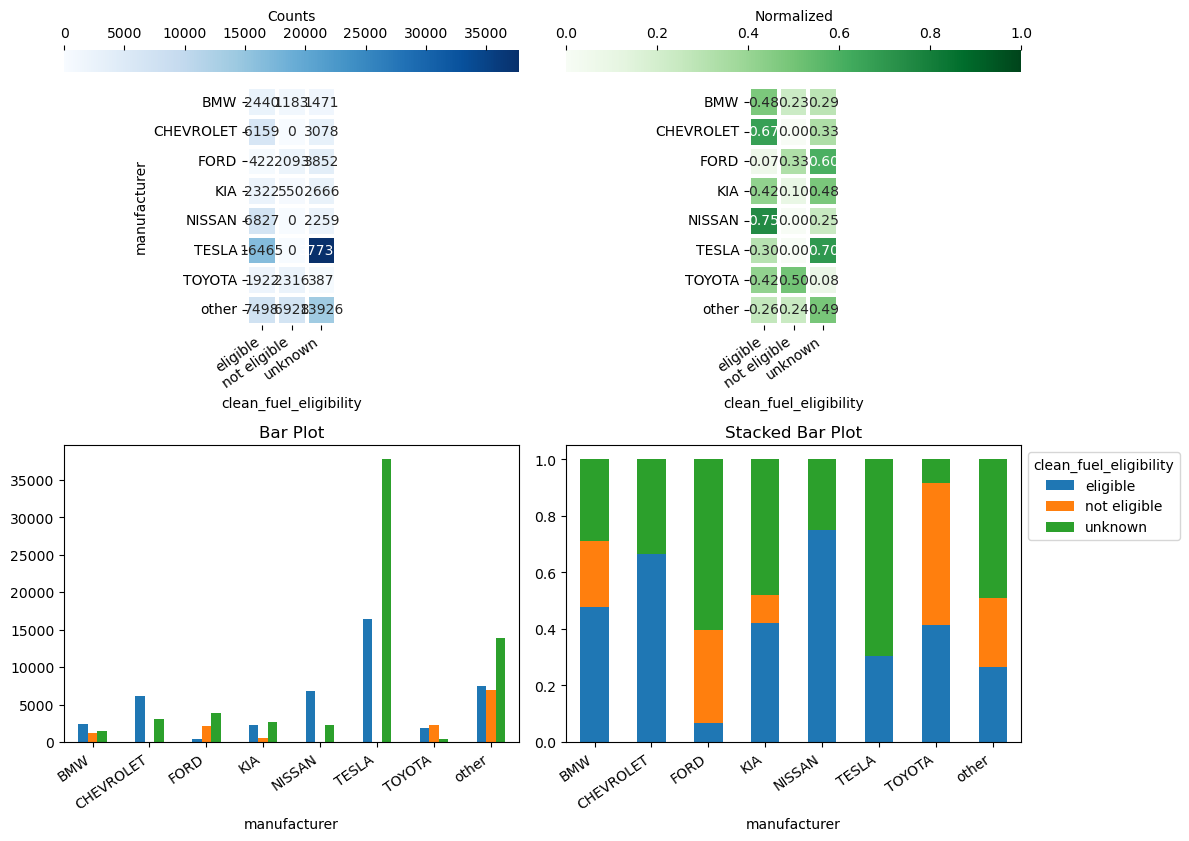

In [83]:
eda_helper_functions.cat_bivar_plots(train,'manufacturer','clean_fuel_eligibility')

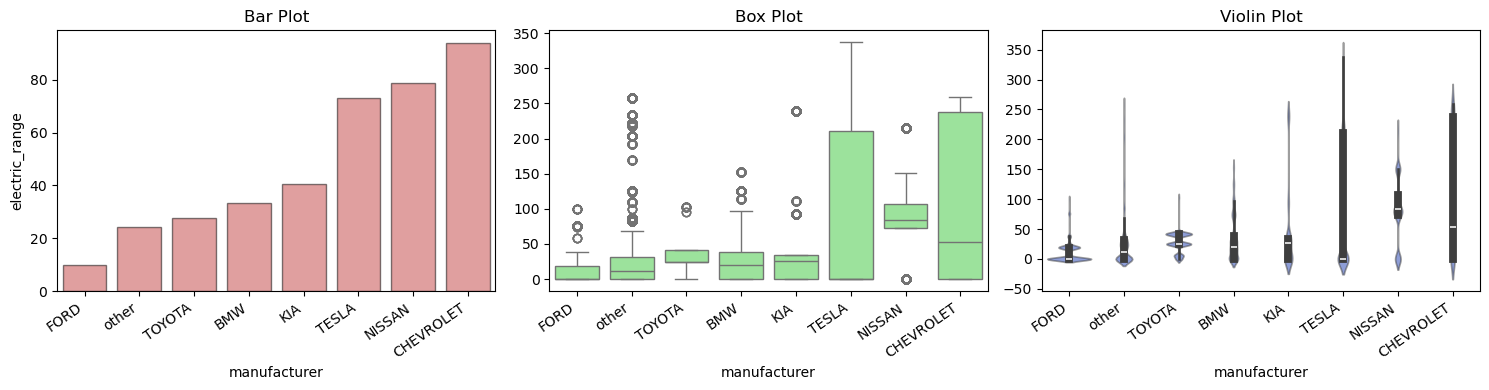

In [84]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var='electric_range',
    cat_var='manufacturer'
)

In [85]:
eda_helper_functions.hyp_cat_cat(train,'manufacturer','model')

- Cramers V            : 0.9994406233549126
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 857500.0
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables manufacturer and model are correlated


In [86]:
eda_helper_functions.hyp_cat_cat(train,'manufacturer','electric_type')

- Cramers V            : 0.6049433158258989
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 44836.29497963861
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables manufacturer and electric_type are correlated


In [87]:
eda_helper_functions.hyp_cat_cat(train,'manufacturer','clean_fuel_eligibility')

- Cramers V            : 0.40289010138946435
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 39781.85710766631
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables manufacturer and clean_fuel_eligibility are correlated


In [88]:
eda_helper_functions.num_cat_hyp_testing(train,'electric_range','manufacturer')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 1608.1086389021061
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and manufacturer are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 9348.197108319897
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and manufacturer are associated to each other


In [89]:
eda_helper_functions.cat_summary(train,'model')

0         BOLT EUV
1            ARIYA
2          MODEL Y
3          MODEL S
4          MODEL Y
            ...   
122495     MODEL S
122496          X5
122497     MODEL Y
122498     MODEL 3
122499     MODEL Y
Name: model, Length: 122500, dtype: object

Data Type      : object
Cardinality    : 145 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 122,500 / 122,500 rows


count    122500
unique      145
top     MODEL Y
freq      25331

count  percentage
category                                   
MODEL Y                   25331    0.206784
MODEL 3                   19743    0.161167
LEAF                       8569    0.069951
MODEL S                    5032    0.041078
BOLT EV                    4124    0.033665
MODEL X                    3978    0.032473
VOLT                       3080    0.025143
ID.4                       2786    0.022743
WRANGLER                   2427    0.019812
MUSTANG MACHE              2386    0.019478
PACIFICA                   2175    0.017755
NIRO                       2164    0.017665
PRIUS PRIME                1925    0.015714
IONIQ 5                    1776    0.014498
BOLT EUV                   1760    0.014367
RAV4 PRIME                 1677    0.013690
R1S                        1557    0.012710
X5                         1540    0.012571
EV6                        1511    0.012335
I3                         1241    0.010131
F150                       1215    0.009918
R1T                        1140    0.009306
FUSION                     1126    0.009192
XC90                        979    0.007992
CMAX                        967    0.007894
I4                          766    0.006253
GRAND CHEROKEE              766    0.006253
SPORTAGE                    744    0.006073
XC60                        730    0.005959
ETRON                       696    0.005682
XC40                        671    0.005478
EGOLF                       669    0.005461
PS2                         608    0.004963
PRIUS PLUGIN                606    0.004947
OUTLANDER                   600    0.004898
IX                          595    0.004857
SOLTERRA                    562    0.004588
CLARITY                     543    0.004433
KONA ELECTRIC               520    0.004245
ARIYA                       517    0.004220
500                         496    0.004049
HARDTOP                     475    0.003878
Q5 E                        469    0.003829
TAYCAN                      438    0.003576
SORENTO                     423    0.003453
Q4                          418    0.003412
HORNET                      414    0.003380
BZ4X                        387    0.003159
CX90                        370    0.003020
A3                          366    0.002988
EDV                         341    0.002784
LYRIQ                       310    0.002531
330E                        303    0.002473
ESCAPE                      270    0.002204
530E                        268    0.002188
C40                         267    0.002180
EV9                         263    0.002147
TRANSIT                     251    0.002049
IONIQ 6                     247    0.002016
Q8                          234    0.001910
SOUL                        233    0.001902
EQBCLASS                    228    0.001861
EQECLASS SUV                226    0.001845
CAYENNE                     225    0.001837
X3                          200    0.001633
AIR                         169    0.001380
IONIQ                       166    0.001355
RZ                          159    0.001298
NX                          159    0.001298
EQSCLASS SUV                154    0.001257
SPARK                       153    0.001249
KONA                        146    0.001192
IPACE                       145    0.001184
SANTA FE                    144    0.001176
FOCUS                       143    0.001167
COUNTRYMAN                  141    0.001151
EQSCLASS SEDAN              140    0.001143
TUCSON                      135    0.001102
SOUL EV                     132    0.001078
GLCCLASS                    130    0.001061
AVIATOR                     121    0.000988
ETRON SPORTBACK             120    0.000980
S60                         107    0.000873
GV60                        104    0.000849
OCEAN                       100    0.000816
GLECLASS                     97    0.000792
FORTWO ELECTRIC DRIVE        97    0.000792
PANAMERA                     92    0.000751
CYBERTRUCK                   88    0.000718
ETRON GT              

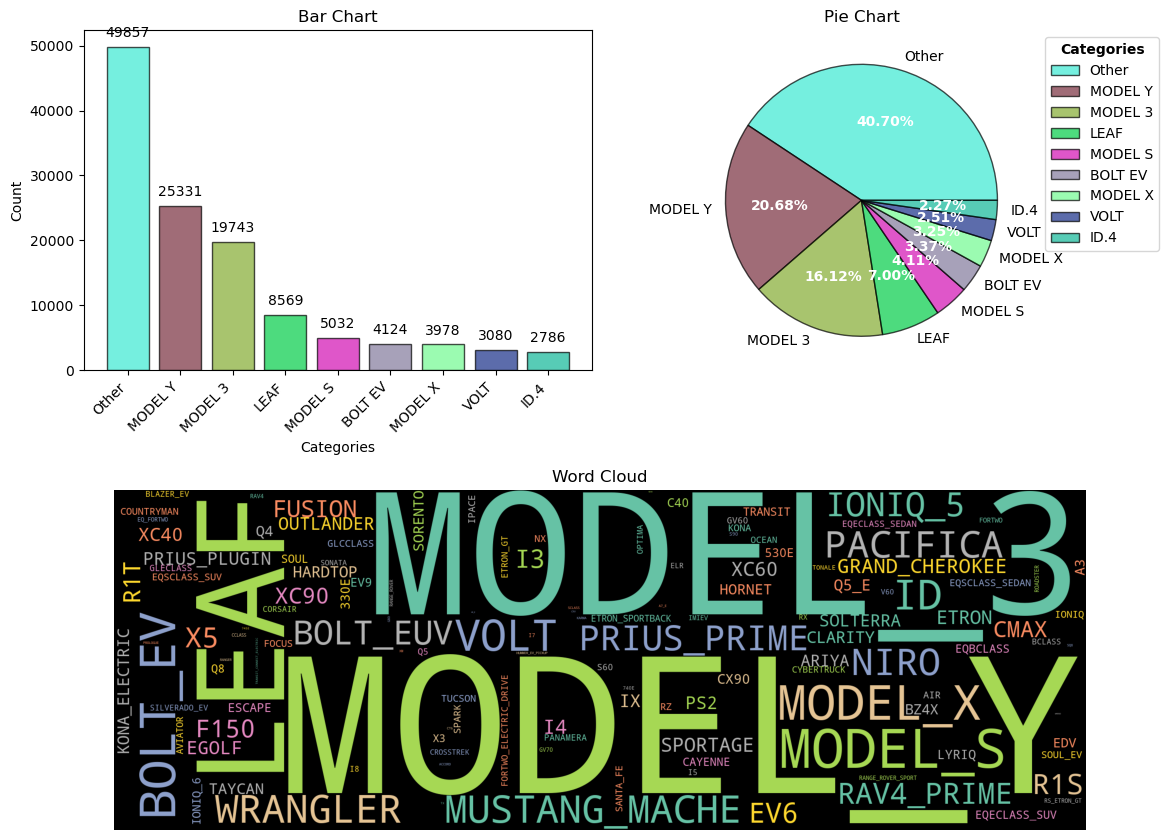

In [90]:
eda_helper_functions.cat_univar_plots(train,'model',k=8)

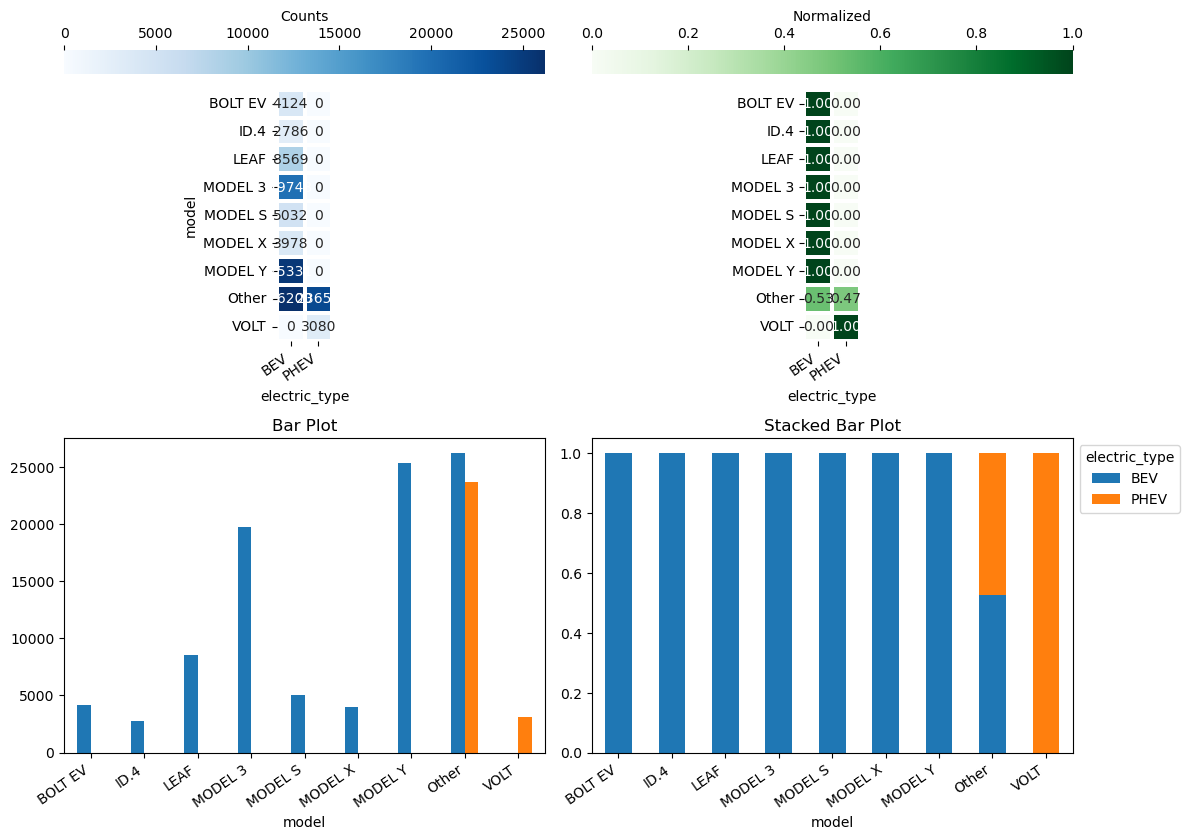

In [91]:
eda_helper_functions.cat_bivar_plots(train,'model','electric_type',k1=8)

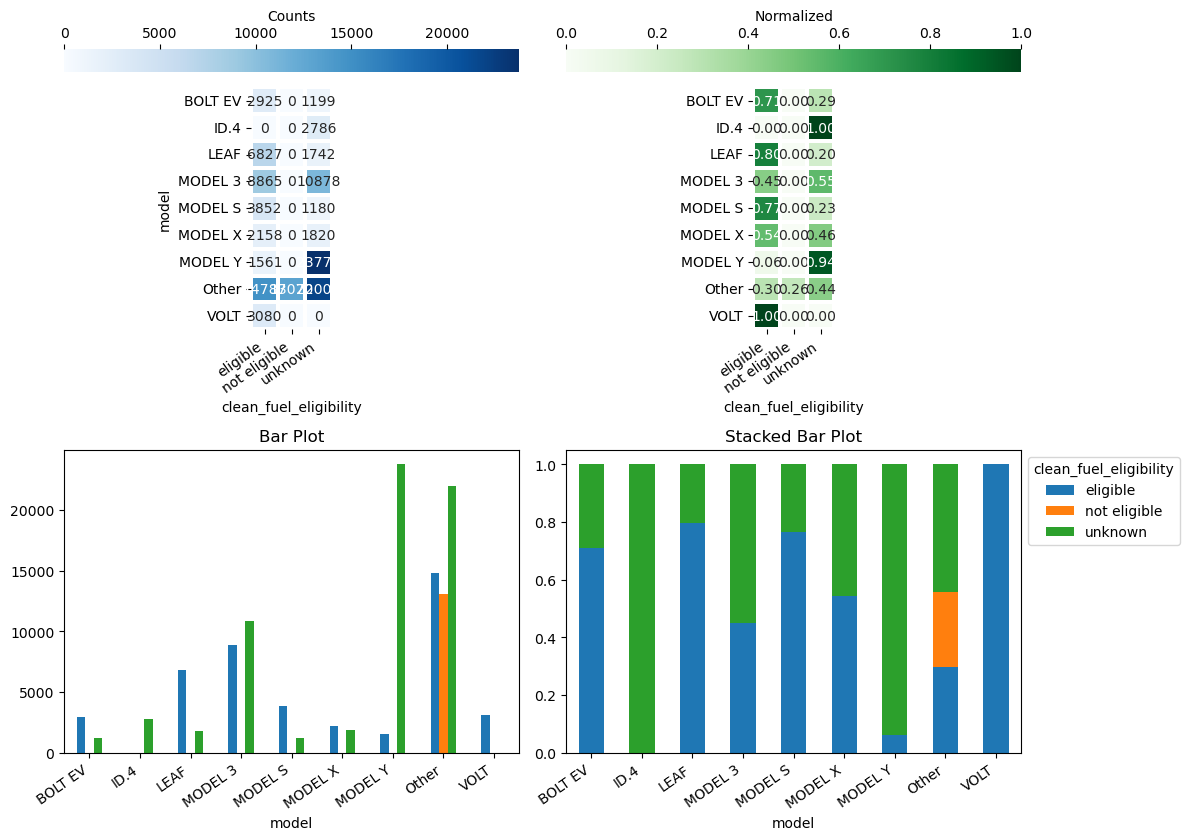

In [92]:
eda_helper_functions.cat_bivar_plots(train,'model','clean_fuel_eligibility',k1=8)

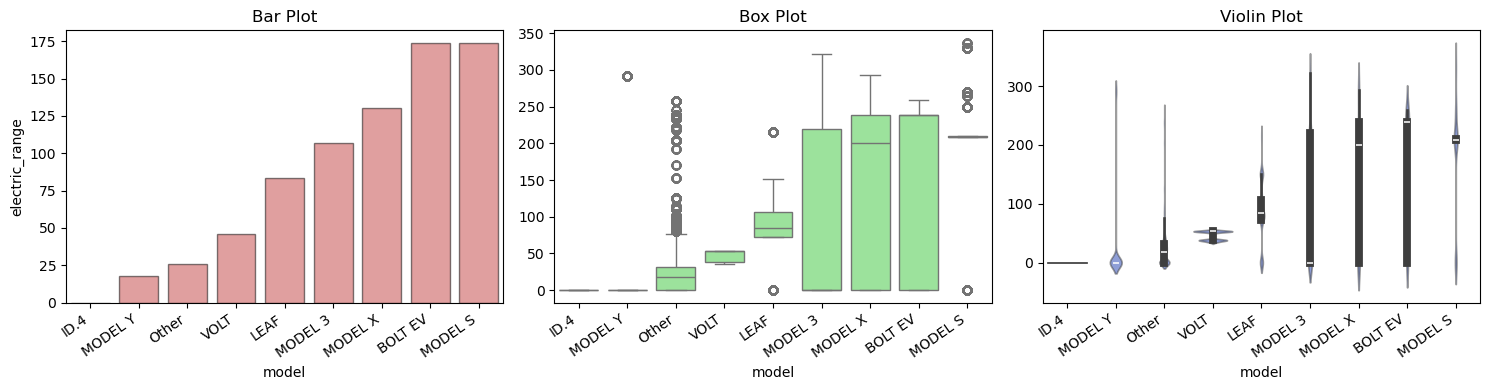

In [97]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var='electric_range',
    cat_var='model',
    k=8
)

In [102]:
eda_helper_functions.hyp_cat_cat(train,'model','electric_type')

- Cramers V            : 0.9804374501487384
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 117897.09513271367
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables model and electric_type are correlated


In [106]:
eda_helper_functions.hyp_cat_cat(train,'model','clean_fuel_eligibility')

- Cramers V            : 0.8434305445462151
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 174572.0522784906
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables model and clean_fuel_eligibility are correlated


In [110]:
eda_helper_functions.num_cat_hyp_testing(train,'electric_range','model')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 467.56091191411684
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and model are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 56279.52501228106
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and model are associated to each other


## electric_type

In [112]:
eda_helper_functions.cat_summary(train,'electric_type')

0          BEV
1          BEV
2          BEV
3          BEV
4          BEV
          ... 
122495     BEV
122496    PHEV
122497     BEV
122498     BEV
122499     BEV
Name: electric_type, Length: 122500, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 122,500 / 122,500 rows


count   122500
unique       2
top        BEV
freq     95763

count  percentage
category                   
BEV       95763    0.781739
PHEV      26737    0.218261

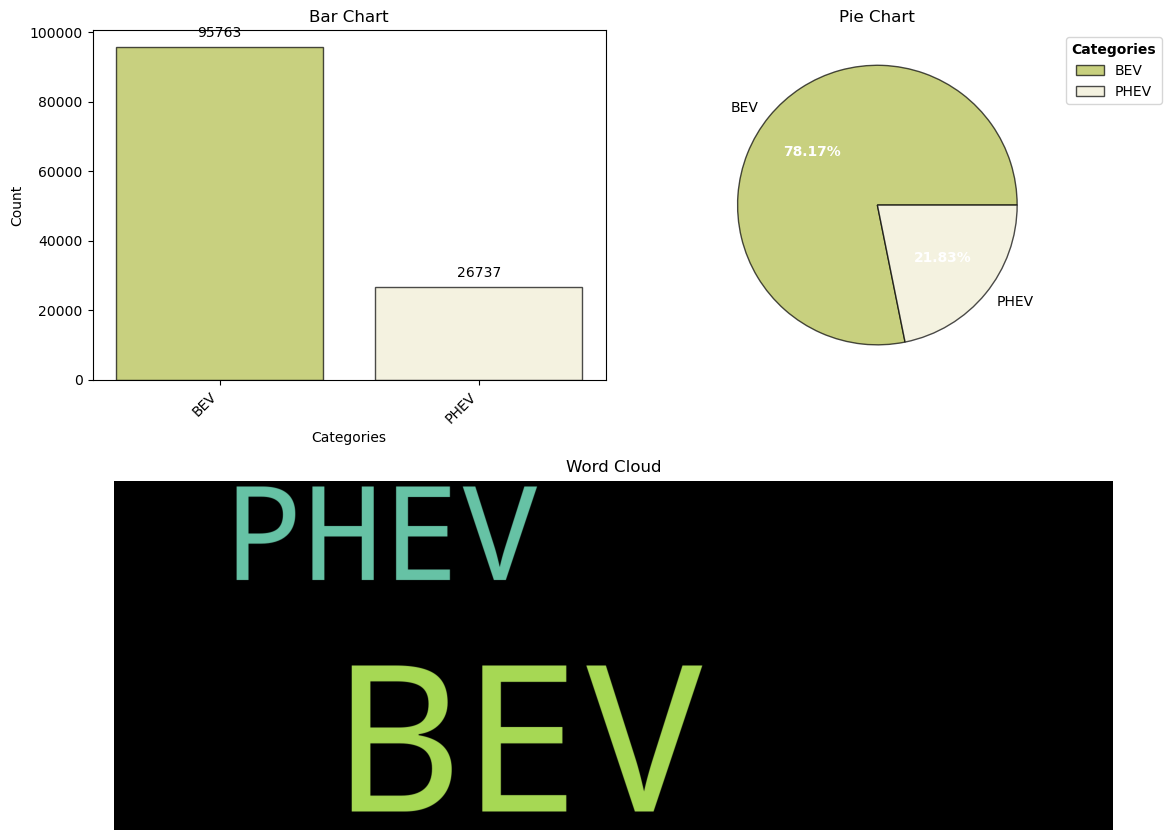

In [117]:
eda_helper_functions.cat_univar_plots(train,'electric_type')

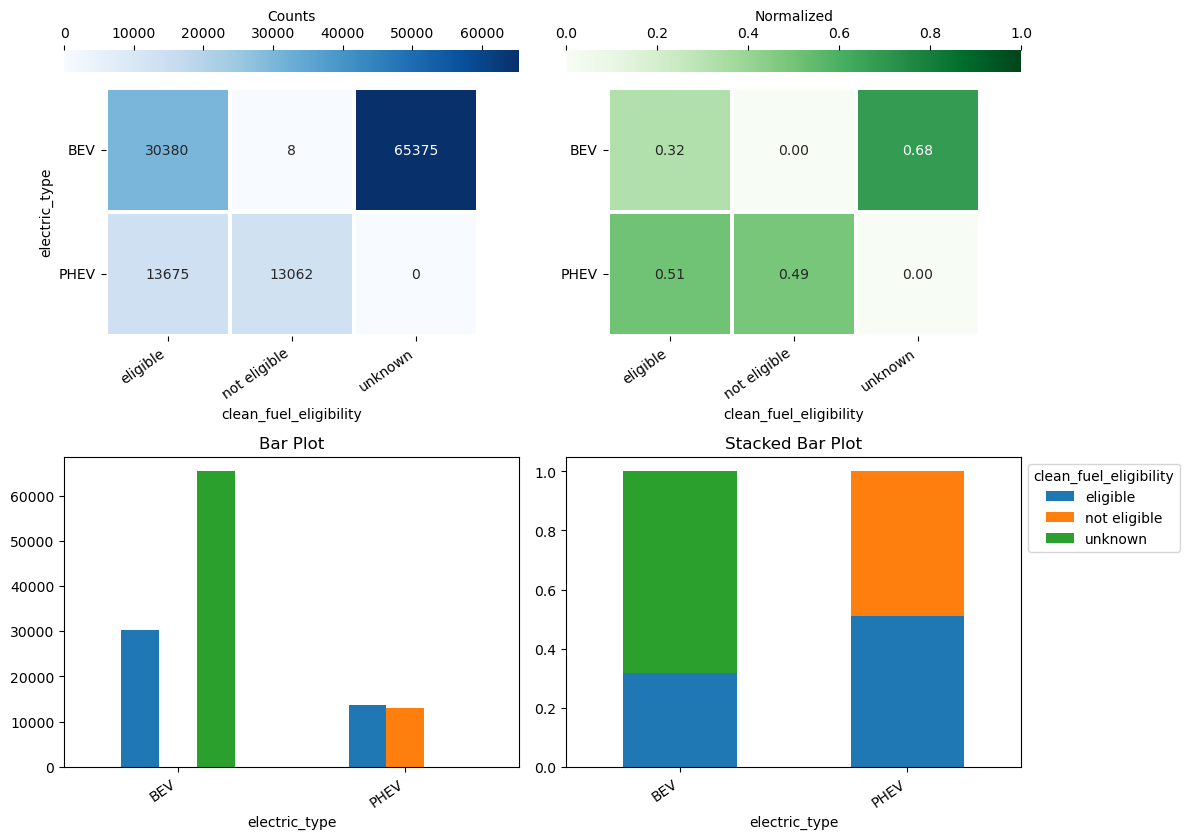

In [115]:
eda_helper_functions.cat_bivar_plots(train,'electric_type','clean_fuel_eligibility')

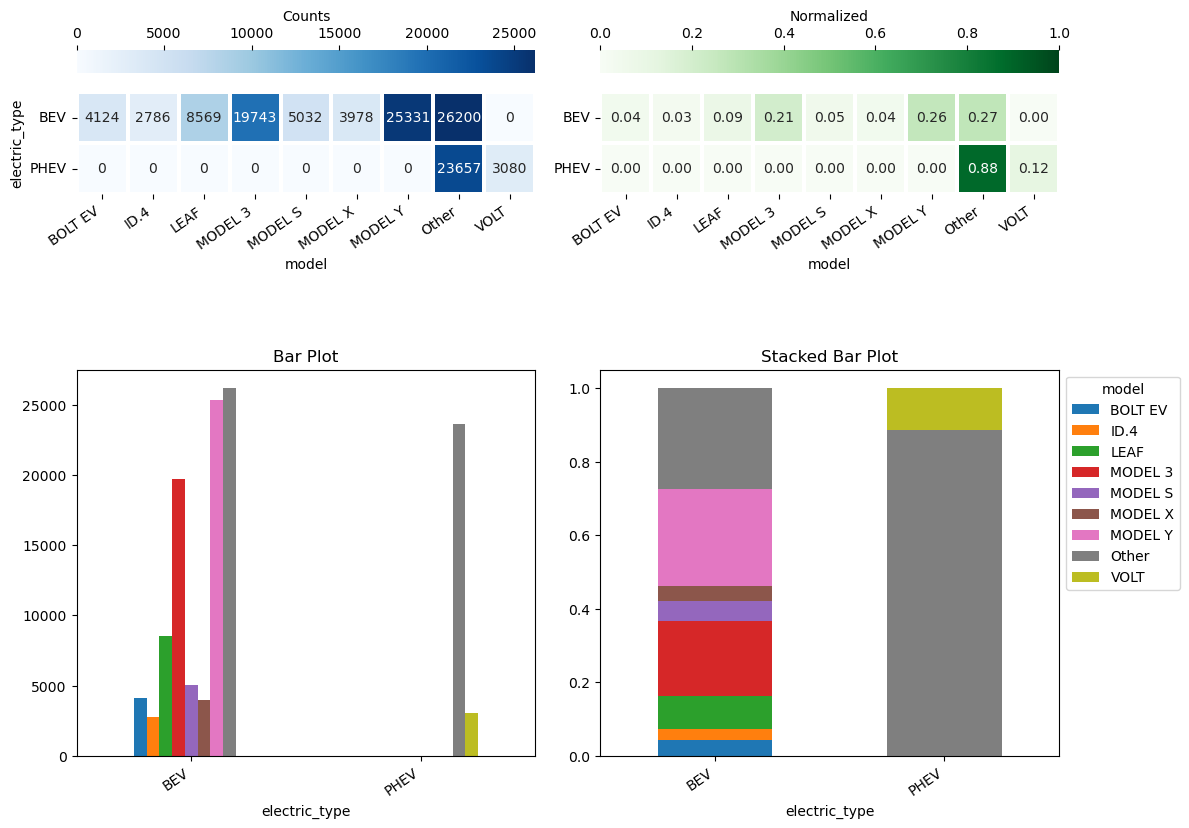

In [125]:
eda_helper_functions.cat_bivar_plots(train,'electric_type','model',k2=8)

In [128]:
eda_helper_functions.hyp_cat_cat(train,'electric_type','clean_fuel_eligibility')

- Cramers V            : 0.7405606467267911
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 67184.13533812755
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_type and clean_fuel_eligibility are correlated


In [130]:
eda_helper_functions.num_cat_hyp_testing(
    data=train,
    num_var='electric_range',
    cat_var='electric_type'
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 2618.9904823296506
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and electric_type are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 9991.700106558417
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and electric_type are associated to each other


## clean_fuel_eligibility

In [135]:
eda_helper_functions.cat_summary(train,'clean_fuel_eligibility')

0          unknown
1          unknown
2          unknown
3         eligible
4          unknown
            ...   
122495    eligible
122496    eligible
122497     unknown
122498     unknown
122499     unknown
Name: clean_fuel_eligibility, Length: 122500, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 122,500 / 122,500 rows


count    122500
unique        3
top     unknown
freq      65375

count  percentage
category                       
unknown       65375    0.533673
eligible      44055    0.359633
not eligible  13070    0.106694

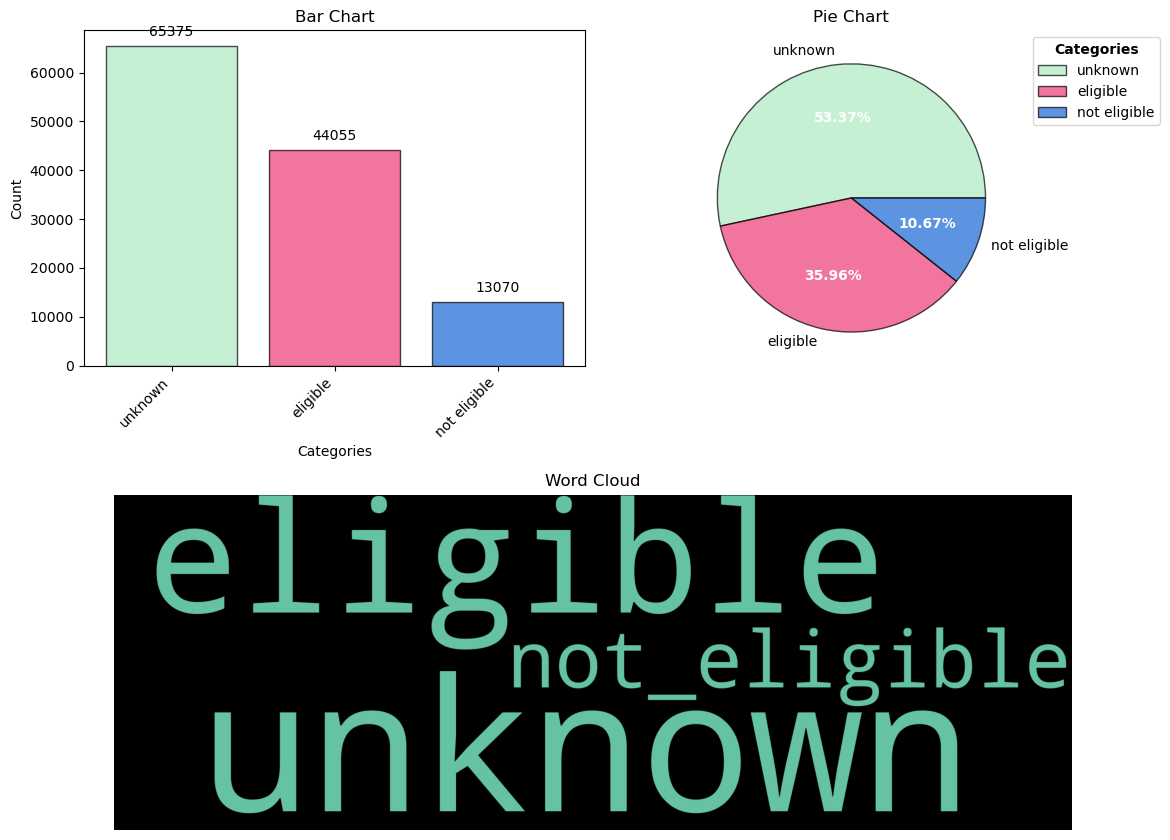

In [137]:
eda_helper_functions.cat_univar_plots(train,'clean_fuel_eligibility')

In [139]:
eda_helper_functions.num_cat_hyp_testing(
    data=train,
    num_var='electric_range',
    cat_var='clean_fuel_eligibility'
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 93439.5838456954
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and clean_fuel_eligibility are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 115620.56305844543
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables electric_range and clean_fuel_eligibility are associated to each other


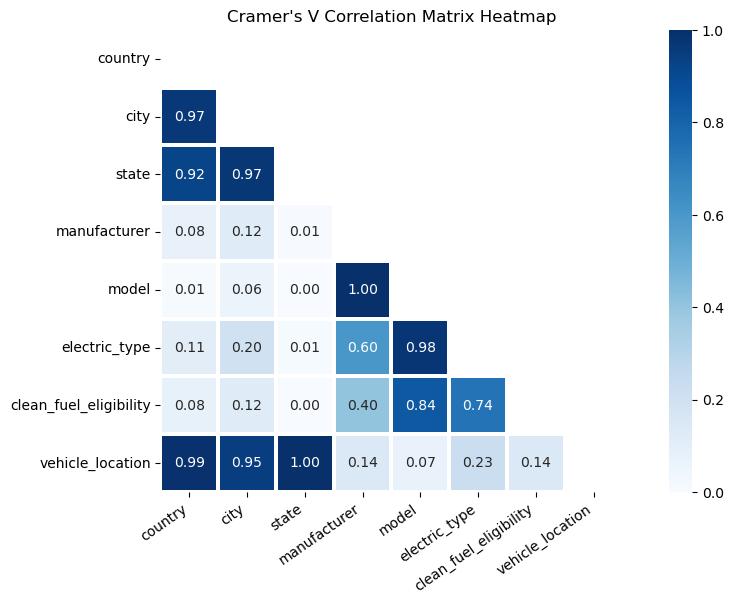

In [142]:
eda_helper_functions.cramersV_heatmap(train)

## Automatic EDA

In [144]:
from ydata_profiling import ProfileReport

In [146]:
report = ProfileReport(train)

In [148]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [150]:
report.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]